In [85]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='white')
%matplotlib inline
from sklearn import decomposition
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

from sklearn.cluster import KMeans


import pandas
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from scipy import stats
from sklearn.preprocessing import scale
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler


import numpy as np; import pandas as pd; import pyodbc; import datetime; from dateutil import relativedelta
import sklearn; from sklearn import feature_selection, linear_model, grid_search, cross_validation, metrics, ensemble, learning_curve; from sklearn.feature_selection import chi2, f_classif, SelectKBest; from sklearn.preprocessing import StandardScaler
import os; import math; import pickle; import xgboost as xgb; os.environ['NLS_LANG'] = 'American_America.AL32UTF8'

conn = pyodbc.connect(r'DRIVER={SQL Server Native Client 11.0};'r'SERVER=WIN-5G5AUOCEJPK;'r'DATABASE=PepsiCo_new;'r'Trusted_Connection=yes;')

C:\Program Files\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarn

In [2]:

sql_query = "SELECT * FROM CT_Sellin_v2 where WEEK_ID_Skvoz>26 and WEEK_ID_Skvoz<=177 AND NOT Volume IS NULL  AND NOT SKU_ID = 44 order by WEEK_ID_Skvoz"
df_ob = pd.read_sql(sql_query, conn)
sql_query = "SELECT * FROM CT_Sellin_v2 where WEEK_ID_Skvoz>177 AND NOT SKU_ID = 44 order by WEEK_ID_Skvoz"
df_pro = pd.read_sql(sql_query, conn)


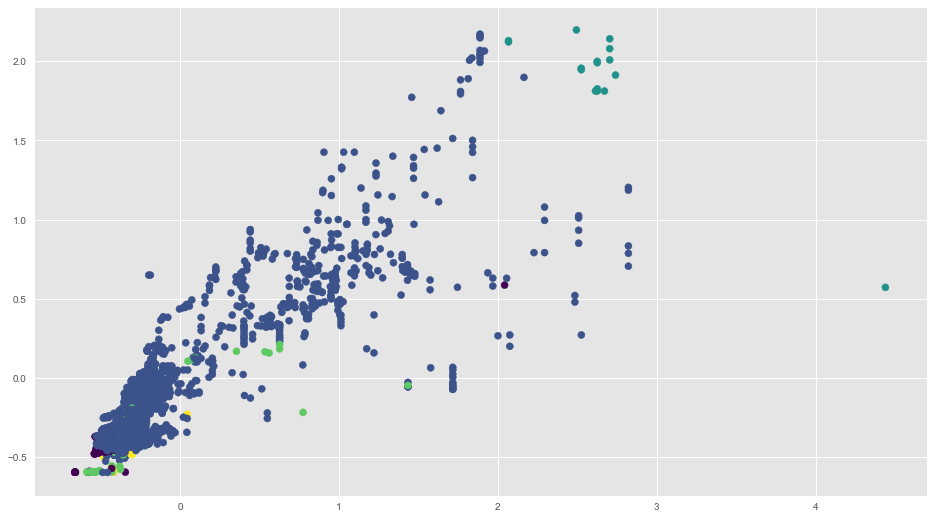

In [3]:
#5

df_t=df_ob[['L26W_VOL_M','L26W_VOL_L','AVG_Cnt_stores_L','AVG_Cnt_stores_M','L15_26W_VOL_L','L15_26W_VOL_M']].fillna(0).loc[df_ob['Customer'] == 'Pyaterochka']
scaler = StandardScaler()
scaler.fit(df_t[['L26W_VOL_M','L26W_VOL_L','AVG_Cnt_stores_L','AVG_Cnt_stores_M','L15_26W_VOL_L','L15_26W_VOL_M']])
df_t[['L26W_VOL_M','L26W_VOL_L','AVG_Cnt_stores_L','AVG_Cnt_stores_M','L15_26W_VOL_L','L15_26W_VOL_M']] = scaler.transform(df_t[['L26W_VOL_M','L26W_VOL_L','AVG_Cnt_stores_L','AVG_Cnt_stores_M','L15_26W_VOL_L','L15_26W_VOL_M']])
kmeans = KMeans(n_clusters=5).fit(df_t)
labels = kmeans.predict(df_t)
df_t['pred'] = kmeans.predict(df_t)
df_ob['CL_5'] = df_t['pred'] 
 

df_t=df_pro[['L26W_VOL_M','L26W_VOL_L','AVG_Cnt_stores_L','AVG_Cnt_stores_M','L15_26W_VOL_L','L15_26W_VOL_M']].fillna(0).loc[df_pro['Customer'] == 'Pyaterochka']
df_t[['L26W_VOL_M','L26W_VOL_L','AVG_Cnt_stores_L','AVG_Cnt_stores_M','L15_26W_VOL_L','L15_26W_VOL_M']] = scaler.transform(df_t[['L26W_VOL_M','L26W_VOL_L','AVG_Cnt_stores_L','AVG_Cnt_stores_M','L15_26W_VOL_L','L15_26W_VOL_M']])
labels = kmeans.predict(df_t)
df_t['pred'] = kmeans.predict(df_t)
df_pro['CL_5'] = df_t['pred'] 
plt.scatter(df_t['L26W_VOL_M'], df_t['L26W_VOL_L'], c=df_t['pred'], cmap='viridis')

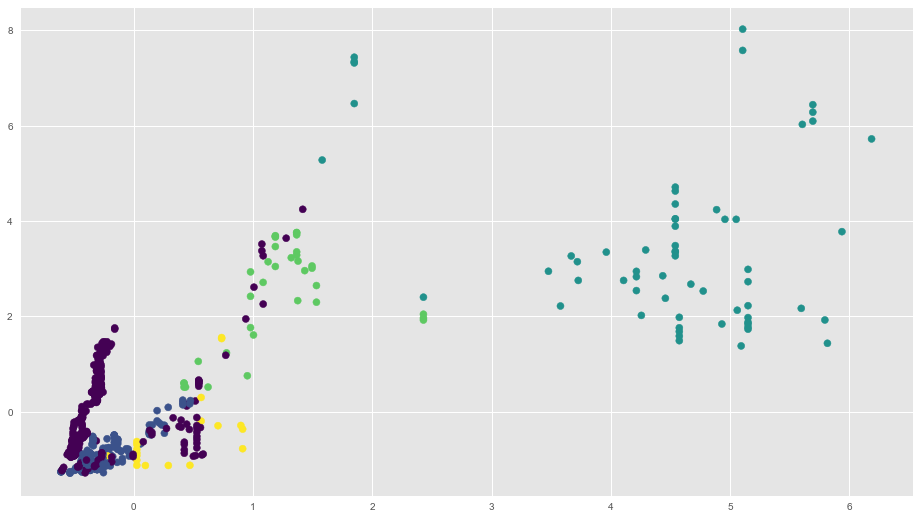

In [4]:
#Lenta

df_t=df_ob[['L26W_VOL_M','L26W_VOL_L','AVG_Cnt_stores_L','AVG_Cnt_stores_M','L15_26W_VOL_L','L15_26W_VOL_M']].fillna(0).loc[df_ob['Customer'] == 'Lenta']
scaler = StandardScaler()
scaler.fit(df_t[['L26W_VOL_M','L26W_VOL_L','AVG_Cnt_stores_L','AVG_Cnt_stores_M','L15_26W_VOL_L','L15_26W_VOL_M']])
df_t[['L26W_VOL_M','L26W_VOL_L','AVG_Cnt_stores_L','AVG_Cnt_stores_M','L15_26W_VOL_L','L15_26W_VOL_M']] = scaler.transform(df_t[['L26W_VOL_M','L26W_VOL_L','AVG_Cnt_stores_L','AVG_Cnt_stores_M','L15_26W_VOL_L','L15_26W_VOL_M']])
kmeans = KMeans(n_clusters=5).fit(df_t)
labels = kmeans.predict(df_t)
df_t['pred'] = kmeans.predict(df_t)
df_ob['CL_Lenta'] = df_t['pred'] 
 

df_t=df_pro[['L26W_VOL_M','L26W_VOL_L','AVG_Cnt_stores_L','AVG_Cnt_stores_M','L15_26W_VOL_L','L15_26W_VOL_M']].fillna(0).loc[df_pro['Customer'] == 'Lenta']
df_t[['L26W_VOL_M','L26W_VOL_L','AVG_Cnt_stores_L','AVG_Cnt_stores_M','L15_26W_VOL_L','L15_26W_VOL_M']] = scaler.transform(df_t[['L26W_VOL_M','L26W_VOL_L','AVG_Cnt_stores_L','AVG_Cnt_stores_M','L15_26W_VOL_L','L15_26W_VOL_M']])
labels = kmeans.predict(df_t)
df_t['pred'] = kmeans.predict(df_t)
df_pro['CL_Lenta'] = df_t['pred'] 
plt.scatter(df_t['L26W_VOL_M'], df_t['L26W_VOL_L'], c=df_t['pred'], cmap='viridis')


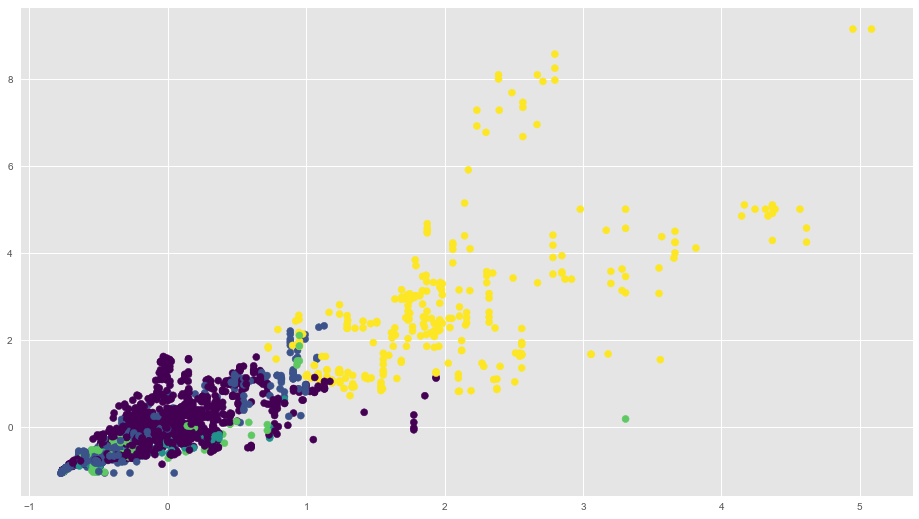

In [5]:
#Tander

df_t=df_ob[['L26W_VOL_M','L26W_VOL_L','AVG_Cnt_stores_L','AVG_Cnt_stores_M','L15_26W_VOL_L','L15_26W_VOL_M']].fillna(0).loc[df_ob['Customer'] == 'Tander']
scaler = StandardScaler()
scaler.fit(df_t[['L26W_VOL_M','L26W_VOL_L','AVG_Cnt_stores_L','AVG_Cnt_stores_M','L15_26W_VOL_L','L15_26W_VOL_M']])
df_t[['L26W_VOL_M','L26W_VOL_L','AVG_Cnt_stores_L','AVG_Cnt_stores_M','L15_26W_VOL_L','L15_26W_VOL_M']] = scaler.transform(df_t[['L26W_VOL_M','L26W_VOL_L','AVG_Cnt_stores_L','AVG_Cnt_stores_M','L15_26W_VOL_L','L15_26W_VOL_M']])
kmeans = KMeans(n_clusters=5).fit(df_t)
labels = kmeans.predict(df_t)
df_t['pred'] = kmeans.predict(df_t)
df_ob['CL_Tander'] = df_t['pred'] 
 

df_t=df_pro[['L26W_VOL_M','L26W_VOL_L','AVG_Cnt_stores_L','AVG_Cnt_stores_M','L15_26W_VOL_L','L15_26W_VOL_M']].fillna(0).loc[df_pro['Customer'] == 'Tander']
df_t[['L26W_VOL_M','L26W_VOL_L','AVG_Cnt_stores_L','AVG_Cnt_stores_M','L15_26W_VOL_L','L15_26W_VOL_M']] = scaler.transform(df_t[['L26W_VOL_M','L26W_VOL_L','AVG_Cnt_stores_L','AVG_Cnt_stores_M','L15_26W_VOL_L','L15_26W_VOL_M']])
labels = kmeans.predict(df_t)
df_t['pred'] = kmeans.predict(df_t)
df_pro['CL_Tander'] = df_t['pred'] 
plt.scatter(df_t['L26W_VOL_M'], df_t['L26W_VOL_L'], c=df_t['pred'], cmap='viridis')

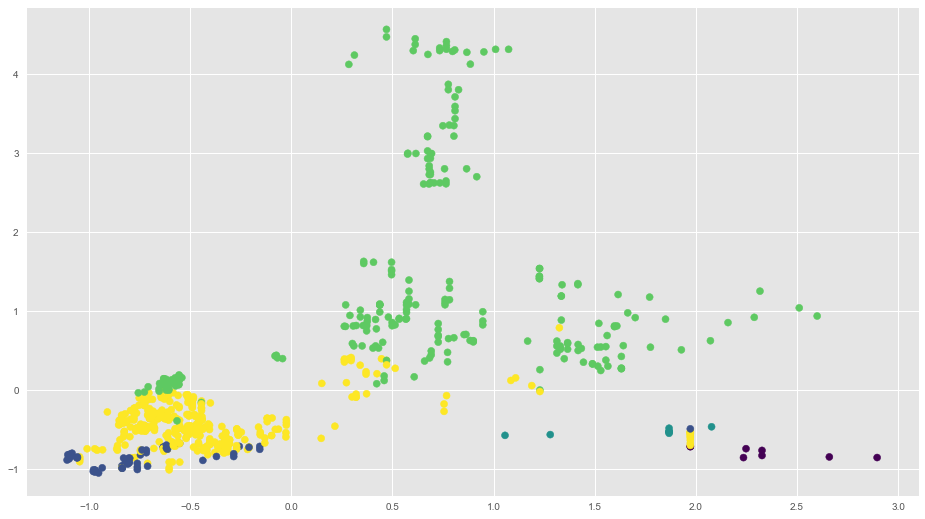

In [6]:
#Perekrestok

df_t=df_ob[['L26W_VOL_M','L26W_VOL_L','AVG_Cnt_stores_L','AVG_Cnt_stores_M','L15_26W_VOL_L','L15_26W_VOL_M']].fillna(0).loc[df_ob['Customer'] == 'Perekrestok']
scaler = StandardScaler()
scaler.fit(df_t[['L26W_VOL_M','L26W_VOL_L','AVG_Cnt_stores_L','AVG_Cnt_stores_M','L15_26W_VOL_L','L15_26W_VOL_M']])
df_t[['L26W_VOL_M','L26W_VOL_L','AVG_Cnt_stores_L','AVG_Cnt_stores_M','L15_26W_VOL_L','L15_26W_VOL_M']] = scaler.transform(df_t[['L26W_VOL_M','L26W_VOL_L','AVG_Cnt_stores_L','AVG_Cnt_stores_M','L15_26W_VOL_L','L15_26W_VOL_M']])
kmeans = KMeans(n_clusters=5).fit(df_t)
labels = kmeans.predict(df_t)
df_t['pred'] = kmeans.predict(df_t)
df_ob['CL_Perekrestok'] = df_t['pred'] 
 

df_t=df_pro[['L26W_VOL_M','L26W_VOL_L','AVG_Cnt_stores_L','AVG_Cnt_stores_M','L15_26W_VOL_L','L15_26W_VOL_M']].fillna(0).loc[df_pro['Customer'] == 'Perekrestok']
df_t[['L26W_VOL_M','L26W_VOL_L','AVG_Cnt_stores_L','AVG_Cnt_stores_M','L15_26W_VOL_L','L15_26W_VOL_M']] = scaler.transform(df_t[['L26W_VOL_M','L26W_VOL_L','AVG_Cnt_stores_L','AVG_Cnt_stores_M','L15_26W_VOL_L','L15_26W_VOL_M']])
labels = kmeans.predict(df_t)
df_t['pred'] = kmeans.predict(df_t)
df_pro['CL_Perekrestok'] = df_t['pred'] 
plt.scatter(df_t['L26W_VOL_M'], df_t['L26W_VOL_L'], c=df_t['pred'], cmap='viridis')

In [7]:
df_ob['Cl']=df_ob['CL_5'].fillna(0)+df_ob['CL_Lenta'].fillna(0)+df_ob['CL_Tander'].fillna(0)+df_ob['CL_Perekrestok'].fillna(0)
df_pro['Cl']=df_pro['CL_5'].fillna(0)+df_pro['CL_Lenta'].fillna(0)+df_pro['CL_Tander'].fillna(0)+df_pro['CL_Perekrestok'].fillna(0)

df_ob

,WEEK_ID,WEEK_ID_Skvoz,Customer,Holidays,NumMonth,NumSeason,SKU_ID,SKU_Name,Volume,AVG_Cnt_stores,...,L7W_VOL_L,L15W_VOL_L,L26W_VOL_L,L7_15W_VOL_L,L15_26W_VOL_L,CL_5,CL_Lenta,CL_Tander,CL_Perekrestok,Cl
0,201427,27,Lenta,0.285714,7,3,40,PEPSI LIGHT 1.75L PET,7866,49,...,4812.0,4807.0,4710,1.001040,1.020594,NaN,1.0,NaN,NaN,1.0
1,201427,27,Perekrestok,0.285714,7,3,21,LIPTON ICE TEA GREEN 1.5L PET,5166,212,...,3248.0,3857.0,3837,0.842105,1.005212,NaN,NaN,NaN,4.0,4.0
2,201427,27,Perekrestok,0.285714,7,3,30,MIRINDA ORANGE 2.25L PET,9120,177,...,2268.0,2276.0,2269,0.996485,1.003085,NaN,NaN,NaN,1.0,1.0
3,201427,27,Perekrestok,0.285714,7,3,38,PEPSI COLA 2.25L PET,22452,230,...,8399.0,8181.0,8658,1.026647,0.944906,NaN,NaN,NaN,4.0,4.0
4,201427,27,Pyaterochka,0.285714,7,3,4,7UP LIME MINT 0.6L PET,516,17,...,184.0,178.0,154,1.033708,1.155844,0.0,NaN,NaN,NaN,0.0
5,201427,27,Pyaterochka,0.285714,7,3,21,LIPTON ICE TEA GREEN 1.5L PET,422640,1222,...,NaN,289440.0,176676,NaN,1.638253,2.0,NaN,NaN,NaN,2.0
6,201427,27,Pyaterochka,0.285714,7,3,28,MIRINDA ORANGE 0.6L PET,4752,232,...,NaN,2376.0,2100,NaN,1.131429,0.0,NaN,NaN,NaN,0.0
7,201427,27,Pyaterochka,0.285714,7,3,29,MIRINDA ORANGE 1.75L PET,13806,1092,...,10848.0,11582.0,11461,0.936626,1.010558,0.0,NaN,NaN,NaN,0.0
8,201427,27,Pyaterochka,0.285714,7,3,34,PEPSI COLA 0.33L NRB,47340,1246,...,NaN,27320.0,24437,NaN,1.117977,0.0,NaN,NaN,NaN,0.0
9,201427,27,Tander,0.285714,7,3,16,AQUA MINER STILL 5L PET,3900,80,...,1868.0,2072.0,1883,0.901544,1.100372,NaN,NaN,1.0,NaN,1.0


In [8]:
df_ob = pd.get_dummies(df_ob, columns = ['NumMonth','NumSeason','SKU_ID','ISFPW','IWBPW','IW2BPW','IWAPW','IW2APW'], \
                       drop_first = False)
df_pro = pd.get_dummies(df_pro, columns = ['NumMonth','NumSeason','SKU_ID','ISFPW','IWBPW','IW2BPW','IWAPW','IW2APW'], \
                       drop_first = False)

df_ob = df_ob.drop(['NumMonth_5'], axis=1)
df_pro = df_pro.drop(['NumMonth_5'], axis=1)

In [9]:
df_ob_Pyaterochka = df_ob.loc[df_ob['Customer'] == 'Pyaterochka']

df_ob_Pyaterochka_0 = df_ob_Pyaterochka.loc[df_ob_Pyaterochka['Cl'] == 0]
df_ob_Pyaterochka_0 = df_ob_Pyaterochka_0.reset_index();   df_ob_Pyaterochka_0 = df_ob_Pyaterochka_0.drop(['index'], axis = 1)
train_labels_Pyaterochka_0 = df_ob_Pyaterochka_0['Volume']
train_data_Pyaterochka_0 = df_ob_Pyaterochka_0.drop(['WEEK_ID','WEEK_ID_Skvoz','Volume','SKU_Name','Cnt_stores','Customer','CL_5','CL_Lenta','CL_Tander','CL_Perekrestok','Cl'], axis=1)

df_ob_Pyaterochka_1 = df_ob_Pyaterochka.loc[df_ob_Pyaterochka['Cl'] == 1]
df_ob_Pyaterochka_1 = df_ob_Pyaterochka_1.reset_index();   df_ob_Pyaterochka_1 = df_ob_Pyaterochka_1.drop(['index'], axis = 1)
train_labels_Pyaterochka_1 = df_ob_Pyaterochka_1['Volume']
train_data_Pyaterochka_1 = df_ob_Pyaterochka_1.drop(['WEEK_ID','WEEK_ID_Skvoz','Volume','SKU_Name','Cnt_stores','Customer','CL_5','CL_Lenta','CL_Tander','CL_Perekrestok','Cl'], axis=1)

df_ob_Pyaterochka_2 = df_ob_Pyaterochka.loc[df_ob_Pyaterochka['Cl'] == 2]
df_ob_Pyaterochka_2 = df_ob_Pyaterochka_2.reset_index();   df_ob_Pyaterochka_2 = df_ob_Pyaterochka_2.drop(['index'], axis = 1)
train_labels_Pyaterochka_2 = df_ob_Pyaterochka_2['Volume']
train_data_Pyaterochka_2 = df_ob_Pyaterochka_2.drop(['WEEK_ID','WEEK_ID_Skvoz','Volume','SKU_Name','Cnt_stores','Customer','CL_5','CL_Lenta','CL_Tander','CL_Perekrestok','Cl'], axis=1)

df_ob_Pyaterochka_3 = df_ob_Pyaterochka.loc[df_ob_Pyaterochka['Cl'] == 3]
df_ob_Pyaterochka_3 = df_ob_Pyaterochka_3.reset_index();   df_ob_Pyaterochka_3 = df_ob_Pyaterochka_3.drop(['index'], axis = 1)
train_labels_Pyaterochka_3 = df_ob_Pyaterochka_3['Volume']
train_data_Pyaterochka_3 = df_ob_Pyaterochka_3.drop(['WEEK_ID','WEEK_ID_Skvoz','Volume','SKU_Name','Cnt_stores','Customer','CL_5','CL_Lenta','CL_Tander','CL_Perekrestok','Cl'], axis=1)

df_ob_Pyaterochka_4 = df_ob_Pyaterochka.loc[df_ob_Pyaterochka['Cl'] == 4]
df_ob_Pyaterochka_4 = df_ob_Pyaterochka_4.reset_index();   df_ob_Pyaterochka_4 = df_ob_Pyaterochka_4.drop(['index'], axis = 1)
train_labels_Pyaterochka_4 = df_ob_Pyaterochka_4['Volume']
train_data_Pyaterochka_4 = df_ob_Pyaterochka_4.drop(['WEEK_ID','WEEK_ID_Skvoz','Volume','SKU_Name','Cnt_stores','Customer','CL_5','CL_Lenta','CL_Tander','CL_Perekrestok','Cl'], axis=1)

df_ob_Perekrestok = df_ob.loc[df_ob['Customer'] == 'Perekrestok']

df_ob_Perekrestok_0 = df_ob_Perekrestok.loc[df_ob_Perekrestok['Cl'] == 0]
df_ob_Perekrestok_0 = df_ob_Perekrestok_0.reset_index();   df_ob_Perekrestok_0 = df_ob_Perekrestok_0.drop(['index'], axis = 1)
train_labels_Perekrestok_0 = df_ob_Perekrestok_0['Volume']
train_data_Perekrestok_0 = df_ob_Perekrestok_0.drop(['WEEK_ID','WEEK_ID_Skvoz','Volume','SKU_Name','Cnt_stores','Customer','CL_5','CL_Lenta','CL_Tander','CL_Perekrestok','Cl'], axis=1)

df_ob_Perekrestok_1 = df_ob_Perekrestok.loc[df_ob_Perekrestok['Cl'] == 1]
df_ob_Perekrestok_1 = df_ob_Perekrestok_1.reset_index();   df_ob_Perekrestok_1 = df_ob_Perekrestok_1.drop(['index'], axis = 1)
train_labels_Perekrestok_1 = df_ob_Perekrestok_1['Volume']
train_data_Perekrestok_1 = df_ob_Perekrestok_1.drop(['WEEK_ID','WEEK_ID_Skvoz','Volume','SKU_Name','Cnt_stores','Customer','CL_5','CL_Lenta','CL_Tander','CL_Perekrestok','Cl'], axis=1)

df_ob_Perekrestok_2 = df_ob_Perekrestok.loc[df_ob_Perekrestok['Cl'] == 2]
df_ob_Perekrestok_2 = df_ob_Perekrestok_2.reset_index();   df_ob_Perekrestok_2 = df_ob_Perekrestok_2.drop(['index'], axis = 1)
train_labels_Perekrestok_2 = df_ob_Perekrestok_2['Volume']
train_data_Perekrestok_2 = df_ob_Perekrestok_2.drop(['WEEK_ID','WEEK_ID_Skvoz','Volume','SKU_Name','Cnt_stores','Customer','CL_5','CL_Lenta','CL_Tander','CL_Perekrestok','Cl'], axis=1)

df_ob_Perekrestok_3 = df_ob_Perekrestok.loc[df_ob_Perekrestok['Cl'] == 3]
df_ob_Perekrestok_3 = df_ob_Perekrestok_3.reset_index();   df_ob_Perekrestok_3 = df_ob_Perekrestok_3.drop(['index'], axis = 1)
train_labels_Perekrestok_3 = df_ob_Perekrestok_3['Volume']
train_data_Perekrestok_3 = df_ob_Perekrestok_3.drop(['WEEK_ID','WEEK_ID_Skvoz','Volume','SKU_Name','Cnt_stores','Customer','CL_5','CL_Lenta','CL_Tander','CL_Perekrestok','Cl'], axis=1)

df_ob_Perekrestok_4 = df_ob_Perekrestok.loc[df_ob_Perekrestok['Cl'] == 4]
df_ob_Perekrestok_4 = df_ob_Perekrestok_4.reset_index();   df_ob_Perekrestok_4 = df_ob_Perekrestok_4.drop(['index'], axis = 1)
train_labels_Perekrestok_4 = df_ob_Perekrestok_4['Volume']
train_data_Perekrestok_4 = df_ob_Perekrestok_4.drop(['WEEK_ID','WEEK_ID_Skvoz','Volume','SKU_Name','Cnt_stores','Customer','CL_5','CL_Lenta','CL_Tander','CL_Perekrestok','Cl'], axis=1)

df_ob_Tander = df_ob.loc[df_ob['Customer'] == 'Tander']

df_ob_Tander_0 = df_ob_Tander.loc[df_ob_Tander['Cl'] == 0]
df_ob_Tander_0 = df_ob_Tander_0.reset_index();   df_ob_Tander_0 = df_ob_Tander_0.drop(['index'], axis = 1)
train_labels_Tander_0 = df_ob_Tander_0['Volume']
train_data_Tander_0 = df_ob_Tander_0.drop(['WEEK_ID','WEEK_ID_Skvoz','Volume','SKU_Name','Cnt_stores','Customer','CL_5','CL_Lenta','CL_Tander','CL_Tander','Cl'], axis=1)

df_ob_Tander_1 = df_ob_Tander.loc[df_ob_Tander['Cl'] == 1]
df_ob_Tander_1 = df_ob_Tander_1.reset_index();   df_ob_Tander_1 = df_ob_Tander_1.drop(['index'], axis = 1)
train_labels_Tander_1 = df_ob_Tander_1['Volume']
train_data_Tander_1 = df_ob_Tander_1.drop(['WEEK_ID','WEEK_ID_Skvoz','Volume','SKU_Name','Cnt_stores','Customer','CL_5','CL_Lenta','CL_Tander','CL_Tander','Cl'], axis=1)

df_ob_Tander_2 = df_ob_Tander.loc[df_ob_Tander['Cl'] == 2]
df_ob_Tander_2 = df_ob_Tander_2.reset_index();   df_ob_Tander_2 = df_ob_Tander_2.drop(['index'], axis = 1)
train_labels_Tander_2 = df_ob_Tander_2['Volume']
train_data_Tander_2 = df_ob_Tander_2.drop(['WEEK_ID','WEEK_ID_Skvoz','Volume','SKU_Name','Cnt_stores','Customer','CL_5','CL_Lenta','CL_Tander','CL_Tander','Cl'], axis=1)

df_ob_Tander_3 = df_ob_Tander.loc[df_ob_Tander['Cl'] == 3]
df_ob_Tander_3 = df_ob_Tander_3.reset_index();   df_ob_Tander_3 = df_ob_Tander_3.drop(['index'], axis = 1)
train_labels_Tander_3 = df_ob_Tander_3['Volume']
train_data_Tander_3 = df_ob_Tander_3.drop(['WEEK_ID','WEEK_ID_Skvoz','Volume','SKU_Name','Cnt_stores','Customer','CL_5','CL_Lenta','CL_Tander','CL_Tander','Cl'], axis=1)

df_ob_Tander_4 = df_ob_Tander.loc[df_ob_Tander['Cl'] == 4]
df_ob_Tander_4 = df_ob_Tander_4.reset_index();   df_ob_Tander_4 = df_ob_Tander_4.drop(['index'], axis = 1)
train_labels_Tander_4 = df_ob_Tander_4['Volume']
train_data_Tander_4 = df_ob_Tander_4.drop(['WEEK_ID','WEEK_ID_Skvoz','Volume','SKU_Name','Cnt_stores','Customer','CL_5','CL_Lenta','CL_Tander','CL_Tander','Cl'], axis=1)

df_ob_Tander_5 = df_ob_Tander.loc[df_ob_Tander['Cl'] == 5]
df_ob_Tander_5 = df_ob_Tander_5.reset_index();   df_ob_Tander_5 = df_ob_Tander_5.drop(['index'], axis = 1)
train_labels_Tander_5 = df_ob_Tander_5['Volume']
train_data_Tander_5 = df_ob_Tander_5.drop(['WEEK_ID','WEEK_ID_Skvoz','Volume','SKU_Name','Cnt_stores','Customer','CL_5','CL_Lenta','CL_Tander','CL_Tander','Cl'], axis=1)

df_ob_Lenta = df_ob.loc[df_ob['Customer'] == 'Lenta']

df_ob_Lenta_0 = df_ob_Lenta.loc[df_ob_Lenta['Cl'] == 0]
df_ob_Lenta_0 = df_ob_Lenta_0.reset_index();   df_ob_Lenta_0 = df_ob_Lenta_0.drop(['index'], axis = 1)
train_labels_Lenta_0 = df_ob_Lenta_0['Volume']
train_data_Lenta_0 = df_ob_Lenta_0.drop(['WEEK_ID','WEEK_ID_Skvoz','Volume','SKU_Name','Cnt_stores','Customer','CL_5','CL_Lenta','CL_Lenta','CL_Lenta','Cl'], axis=1)

df_ob_Lenta_1 = df_ob_Lenta.loc[df_ob_Lenta['Cl'] == 1]
df_ob_Lenta_1 = df_ob_Lenta_1.reset_index();   df_ob_Lenta_1 = df_ob_Lenta_1.drop(['index'], axis = 1)
train_labels_Lenta_1 = df_ob_Lenta_1['Volume']
train_data_Lenta_1 = df_ob_Lenta_1.drop(['WEEK_ID','WEEK_ID_Skvoz','Volume','SKU_Name','Cnt_stores','Customer','CL_5','CL_Lenta','CL_Lenta','CL_Lenta','Cl'], axis=1)

df_ob_Lenta_2 = df_ob_Lenta.loc[df_ob_Lenta['Cl'] == 2]
df_ob_Lenta_2 = df_ob_Lenta_2.reset_index();   df_ob_Lenta_2 = df_ob_Lenta_2.drop(['index'], axis = 1)
train_labels_Lenta_2 = df_ob_Lenta_2['Volume']
train_data_Lenta_2 = df_ob_Lenta_2.drop(['WEEK_ID','WEEK_ID_Skvoz','Volume','SKU_Name','Cnt_stores','Customer','CL_5','CL_Lenta','CL_Lenta','CL_Lenta','Cl'], axis=1)

df_ob_Lenta_3 = df_ob_Lenta.loc[df_ob_Lenta['Cl'] == 3]
df_ob_Lenta_3 = df_ob_Lenta_3.reset_index();   df_ob_Lenta_3 = df_ob_Lenta_3.drop(['index'], axis = 1)
train_labels_Lenta_3 = df_ob_Lenta_3['Volume']
train_data_Lenta_3 = df_ob_Lenta_3.drop(['WEEK_ID','WEEK_ID_Skvoz','Volume','SKU_Name','Cnt_stores','Customer','CL_5','CL_Lenta','CL_Lenta','CL_Lenta','Cl'], axis=1)

df_ob_Lenta_4 = df_ob_Lenta.loc[df_ob_Lenta['Cl'] == 4]
df_ob_Lenta_4 = df_ob_Lenta_4.reset_index();   df_ob_Lenta_4 = df_ob_Lenta_4.drop(['index'], axis = 1)
train_labels_Lenta_4 = df_ob_Lenta_4['Volume']
train_data_Lenta_4 = df_ob_Lenta_4.drop(['WEEK_ID','WEEK_ID_Skvoz','Volume','SKU_Name','Cnt_stores','Customer','CL_5','CL_Lenta','CL_Lenta','CL_Lenta','Cl'], axis=1)


In [10]:
df_pro_Pyaterochka = df_pro.loc[df_pro['Customer'] == 'Pyaterochka']

df_pro_Pyaterochka_0 = df_pro_Pyaterochka.loc[df_pro_Pyaterochka['Cl'] == 0]
df_pro_Pyaterochka_0 = df_pro_Pyaterochka_0.reset_index();   df_pro_Pyaterochka_0 = df_pro_Pyaterochka_0.drop(['index'], axis = 1)
pro_labels_Pyaterochka_0 = df_pro_Pyaterochka_0['Volume']
pro_data_Pyaterochka_0 = df_pro_Pyaterochka_0.drop(['WEEK_ID','WEEK_ID_Skvoz','Volume','SKU_Name','Cnt_stores','Customer','CL_5','CL_Lenta','CL_Tander','CL_Perekrestok','Cl'], axis=1)

df_pro_Pyaterochka_1 = df_pro_Pyaterochka.loc[df_pro_Pyaterochka['Cl'] == 1]
df_pro_Pyaterochka_1 = df_pro_Pyaterochka_1.reset_index();   df_pro_Pyaterochka_1 = df_pro_Pyaterochka_1.drop(['index'], axis = 1)
pro_labels_Pyaterochka_1 = df_pro_Pyaterochka_1['Volume']
pro_data_Pyaterochka_1 = df_pro_Pyaterochka_1.drop(['WEEK_ID','WEEK_ID_Skvoz','Volume','SKU_Name','Cnt_stores','Customer','CL_5','CL_Lenta','CL_Tander','CL_Perekrestok','Cl'], axis=1)

df_pro_Pyaterochka_2 = df_pro_Pyaterochka.loc[df_pro_Pyaterochka['Cl'] == 2]
df_pro_Pyaterochka_2 = df_pro_Pyaterochka_2.reset_index();   df_pro_Pyaterochka_2 = df_pro_Pyaterochka_2.drop(['index'], axis = 1)
pro_labels_Pyaterochka_2 = df_pro_Pyaterochka_2['Volume']
pro_data_Pyaterochka_2 = df_pro_Pyaterochka_2.drop(['WEEK_ID','WEEK_ID_Skvoz','Volume','SKU_Name','Cnt_stores','Customer','CL_5','CL_Lenta','CL_Tander','CL_Perekrestok','Cl'], axis=1)

df_pro_Pyaterochka_3 = df_pro_Pyaterochka.loc[df_pro_Pyaterochka['Cl'] == 3]
df_pro_Pyaterochka_3 = df_pro_Pyaterochka_3.reset_index();   df_pro_Pyaterochka_3 = df_pro_Pyaterochka_3.drop(['index'], axis = 1)
pro_labels_Pyaterochka_3 = df_pro_Pyaterochka_3['Volume']
pro_data_Pyaterochka_3 = df_pro_Pyaterochka_3.drop(['WEEK_ID','WEEK_ID_Skvoz','Volume','SKU_Name','Cnt_stores','Customer','CL_5','CL_Lenta','CL_Tander','CL_Perekrestok','Cl'], axis=1)

df_pro_Pyaterochka_4 = df_pro_Pyaterochka.loc[df_pro_Pyaterochka['Cl'] == 4]
df_pro_Pyaterochka_4 = df_pro_Pyaterochka_4.reset_index();   df_pro_Pyaterochka_4 = df_pro_Pyaterochka_4.drop(['index'], axis = 1)
pro_labels_Pyaterochka_4 = df_pro_Pyaterochka_4['Volume']
pro_data_Pyaterochka_4 = df_pro_Pyaterochka_4.drop(['WEEK_ID','WEEK_ID_Skvoz','Volume','SKU_Name','Cnt_stores','Customer','CL_5','CL_Lenta','CL_Tander','CL_Perekrestok','Cl'], axis=1)

df_pro_Perekrestok = df_pro.loc[df_pro['Customer'] == 'Perekrestok']

df_pro_Perekrestok_0 = df_pro_Perekrestok.loc[df_pro_Perekrestok['Cl'] == 0]
df_pro_Perekrestok_0 = df_pro_Perekrestok_0.reset_index();   df_pro_Perekrestok_0 = df_pro_Perekrestok_0.drop(['index'], axis = 1)
pro_labels_Perekrestok_0 = df_pro_Perekrestok_0['Volume']
pro_data_Perekrestok_0 = df_pro_Perekrestok_0.drop(['WEEK_ID','WEEK_ID_Skvoz','Volume','SKU_Name','Cnt_stores','Customer','CL_5','CL_Lenta','CL_Tander','CL_Perekrestok','Cl'], axis=1)

df_pro_Perekrestok_1 = df_pro_Perekrestok.loc[df_pro_Perekrestok['Cl'] == 1]
df_pro_Perekrestok_1 = df_pro_Perekrestok_1.reset_index();   df_pro_Perekrestok_1 = df_pro_Perekrestok_1.drop(['index'], axis = 1)
pro_labels_Perekrestok_1 = df_pro_Perekrestok_1['Volume']
pro_data_Perekrestok_1 = df_pro_Perekrestok_1.drop(['WEEK_ID','WEEK_ID_Skvoz','Volume','SKU_Name','Cnt_stores','Customer','CL_5','CL_Lenta','CL_Tander','CL_Perekrestok','Cl'], axis=1)

df_pro_Perekrestok_2 = df_pro_Perekrestok.loc[df_pro_Perekrestok['Cl'] == 2]
df_pro_Perekrestok_2 = df_pro_Perekrestok_2.reset_index();   df_pro_Perekrestok_2 = df_pro_Perekrestok_2.drop(['index'], axis = 1)
pro_labels_Perekrestok_2 = df_pro_Perekrestok_2['Volume']
pro_data_Perekrestok_2 = df_pro_Perekrestok_2.drop(['WEEK_ID','WEEK_ID_Skvoz','Volume','SKU_Name','Cnt_stores','Customer','CL_5','CL_Lenta','CL_Tander','CL_Perekrestok','Cl'], axis=1)

df_pro_Perekrestok_3 = df_pro_Perekrestok.loc[df_pro_Perekrestok['Cl'] == 3]
df_pro_Perekrestok_3 = df_pro_Perekrestok_3.reset_index();   df_pro_Perekrestok_3 = df_pro_Perekrestok_3.drop(['index'], axis = 1)
pro_labels_Perekrestok_3 = df_pro_Perekrestok_3['Volume']
pro_data_Perekrestok_3 = df_pro_Perekrestok_3.drop(['WEEK_ID','WEEK_ID_Skvoz','Volume','SKU_Name','Cnt_stores','Customer','CL_5','CL_Lenta','CL_Tander','CL_Perekrestok','Cl'], axis=1)

df_pro_Perekrestok_4 = df_pro_Perekrestok.loc[df_pro_Perekrestok['Cl'] == 4]
df_pro_Perekrestok_4 = df_pro_Perekrestok_4.reset_index();   df_pro_Perekrestok_4 = df_pro_Perekrestok_4.drop(['index'], axis = 1)
pro_labels_Perekrestok_4 = df_pro_Perekrestok_4['Volume']
pro_data_Perekrestok_4 = df_pro_Perekrestok_4.drop(['WEEK_ID','WEEK_ID_Skvoz','Volume','SKU_Name','Cnt_stores','Customer','CL_5','CL_Lenta','CL_Tander','CL_Perekrestok','Cl'], axis=1)

df_pro_Tander = df_pro.loc[df_pro['Customer'] == 'Tander']

df_pro_Tander_0 = df_pro_Tander.loc[df_pro_Tander['Cl'] == 0]
df_pro_Tander_0 = df_pro_Tander_0.reset_index();   df_pro_Tander_0 = df_pro_Tander_0.drop(['index'], axis = 1)
pro_labels_Tander_0 = df_pro_Tander_0['Volume']
pro_data_Tander_0 = df_pro_Tander_0.drop(['WEEK_ID','WEEK_ID_Skvoz','Volume','SKU_Name','Cnt_stores','Customer','CL_5','CL_Lenta','CL_Tander','CL_Tander','Cl'], axis=1)

df_pro_Tander_1 = df_pro_Tander.loc[df_pro_Tander['Cl'] == 1]
df_pro_Tander_1 = df_pro_Tander_1.reset_index();   df_pro_Tander_1 = df_pro_Tander_1.drop(['index'], axis = 1)
pro_labels_Tander_1 = df_pro_Tander_1['Volume']
pro_data_Tander_1 = df_pro_Tander_1.drop(['WEEK_ID','WEEK_ID_Skvoz','Volume','SKU_Name','Cnt_stores','Customer','CL_5','CL_Lenta','CL_Tander','CL_Tander','Cl'], axis=1)

df_pro_Tander_2 = df_pro_Tander.loc[df_pro_Tander['Cl'] == 2]
df_pro_Tander_2 = df_pro_Tander_2.reset_index();   df_pro_Tander_2 = df_pro_Tander_2.drop(['index'], axis = 1)
pro_labels_Tander_2 = df_pro_Tander_2['Volume']
pro_data_Tander_2 = df_pro_Tander_2.drop(['WEEK_ID','WEEK_ID_Skvoz','Volume','SKU_Name','Cnt_stores','Customer','CL_5','CL_Lenta','CL_Tander','CL_Tander','Cl'], axis=1)

df_pro_Tander_3 = df_pro_Tander.loc[df_pro_Tander['Cl'] == 3]
df_pro_Tander_3 = df_pro_Tander_3.reset_index();   df_pro_Tander_3 = df_pro_Tander_3.drop(['index'], axis = 1)
pro_labels_Tander_3 = df_pro_Tander_3['Volume']
pro_data_Tander_3 = df_pro_Tander_3.drop(['WEEK_ID','WEEK_ID_Skvoz','Volume','SKU_Name','Cnt_stores','Customer','CL_5','CL_Lenta','CL_Tander','CL_Tander','Cl'], axis=1)

df_pro_Tander_4 = df_pro_Tander.loc[df_pro_Tander['Cl'] == 4]
df_pro_Tander_4 = df_pro_Tander_4.reset_index();   df_pro_Tander_4 = df_pro_Tander_4.drop(['index'], axis = 1)
pro_labels_Tander_4 = df_pro_Tander_4['Volume']
pro_data_Tander_4 = df_pro_Tander_4.drop(['WEEK_ID','WEEK_ID_Skvoz','Volume','SKU_Name','Cnt_stores','Customer','CL_5','CL_Lenta','CL_Tander','CL_Tander','Cl'], axis=1)

df_pro_Lenta = df_pro.loc[df_pro['Customer'] == 'Lenta']

df_pro_Lenta_0 = df_pro_Lenta.loc[df_pro_Lenta['Cl'] == 0]
df_pro_Lenta_0 = df_pro_Lenta_0.reset_index();   df_pro_Lenta_0 = df_pro_Lenta_0.drop(['index'], axis = 1)
pro_labels_Lenta_0 = df_pro_Lenta_0['Volume']
pro_data_Lenta_0 = df_pro_Lenta_0.drop(['WEEK_ID','WEEK_ID_Skvoz','Volume','SKU_Name','Cnt_stores','Customer','CL_5','CL_Lenta','CL_Lenta','CL_Lenta','Cl'], axis=1)

df_pro_Lenta_1 = df_pro_Lenta.loc[df_pro_Lenta['Cl'] == 1]
df_pro_Lenta_1 = df_pro_Lenta_1.reset_index();   df_pro_Lenta_1 = df_pro_Lenta_1.drop(['index'], axis = 1)
pro_labels_Lenta_1 = df_pro_Lenta_1['Volume']
pro_data_Lenta_1 = df_pro_Lenta_1.drop(['WEEK_ID','WEEK_ID_Skvoz','Volume','SKU_Name','Cnt_stores','Customer','CL_5','CL_Lenta','CL_Lenta','CL_Lenta','Cl'], axis=1)

df_pro_Lenta_2 = df_pro_Lenta.loc[df_pro_Lenta['Cl'] == 2]
df_pro_Lenta_2 = df_pro_Lenta_2.reset_index();   df_pro_Lenta_2 = df_pro_Lenta_2.drop(['index'], axis = 1)
pro_labels_Lenta_2 = df_pro_Lenta_2['Volume']
pro_data_Lenta_2 = df_pro_Lenta_2.drop(['WEEK_ID','WEEK_ID_Skvoz','Volume','SKU_Name','Cnt_stores','Customer','CL_5','CL_Lenta','CL_Lenta','CL_Lenta','Cl'], axis=1)

df_pro_Lenta_3 = df_pro_Lenta.loc[df_pro_Lenta['Cl'] == 3]
df_pro_Lenta_3 = df_pro_Lenta_3.reset_index();   df_pro_Lenta_3 = df_pro_Lenta_3.drop(['index'], axis = 1)
pro_labels_Lenta_3 = df_pro_Lenta_3['Volume']
pro_data_Lenta_3 = df_pro_Lenta_3.drop(['WEEK_ID','WEEK_ID_Skvoz','Volume','SKU_Name','Cnt_stores','Customer','CL_5','CL_Lenta','CL_Lenta','CL_Lenta','Cl'], axis=1)

df_pro_Lenta_4 = df_pro_Lenta.loc[df_pro_Lenta['Cl'] == 4]
df_pro_Lenta_4 = df_pro_Lenta_4.reset_index();   df_pro_Lenta_4 = df_pro_Lenta_4.drop(['index'], axis = 1)
pro_labels_Lenta_4 = df_pro_Lenta_4['Volume']
pro_data_Lenta_4 = df_pro_Lenta_4.drop(['WEEK_ID','WEEK_ID_Skvoz','Volume','SKU_Name','Cnt_stores','Customer','CL_5','CL_Lenta','CL_Lenta','CL_Lenta','Cl'], axis=1)


In [11]:
scaler = StandardScaler()
train_data_Pyaterochka_0[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']]= \
train_data_Pyaterochka_0[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']].fillna(0)
scaler.fit(train_data_Pyaterochka_0[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']])
train_data_Pyaterochka_0[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']] = \
scaler.transform(train_data_Pyaterochka_0[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']])
pro_data_Pyaterochka_0[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']]= \
pro_data_Pyaterochka_0[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']].fillna(0)
pro_data_Pyaterochka_0[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']] = \
scaler.transform(pro_data_Pyaterochka_0[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']])

scaler = StandardScaler()
train_data_Pyaterochka_1[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']]= \
train_data_Pyaterochka_1[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']].fillna(0)
scaler.fit(train_data_Pyaterochka_1[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']])
train_data_Pyaterochka_1[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']] = \
scaler.transform(train_data_Pyaterochka_1[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']])
pro_data_Pyaterochka_1[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']]= \
pro_data_Pyaterochka_1[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']].fillna(0)
pro_data_Pyaterochka_1[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']] = \
scaler.transform(pro_data_Pyaterochka_1[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']])

scaler = StandardScaler()
train_data_Pyaterochka_2[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']]= \
train_data_Pyaterochka_2[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']].fillna(0)
scaler.fit(train_data_Pyaterochka_2[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']])
train_data_Pyaterochka_2[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']] = \
scaler.transform(train_data_Pyaterochka_2[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']])
pro_data_Pyaterochka_2[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']]= \
pro_data_Pyaterochka_2[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']].fillna(0)
pro_data_Pyaterochka_2[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']] = \
scaler.transform(pro_data_Pyaterochka_2[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']])

scaler = StandardScaler()
train_data_Pyaterochka_3[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']]= \
train_data_Pyaterochka_3[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']].fillna(0)
scaler.fit(train_data_Pyaterochka_3[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']])
train_data_Pyaterochka_3[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']] = \
scaler.transform(train_data_Pyaterochka_3[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']])
pro_data_Pyaterochka_3[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']]= \
pro_data_Pyaterochka_3[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']].fillna(0)
pro_data_Pyaterochka_3[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']] = \
scaler.transform(pro_data_Pyaterochka_3[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']])

scaler = StandardScaler()
train_data_Pyaterochka_4[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']]= \
train_data_Pyaterochka_4[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']].fillna(0)
scaler.fit(train_data_Pyaterochka_4[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']])
train_data_Pyaterochka_4[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']] = \
scaler.transform(train_data_Pyaterochka_4[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']])
pro_data_Pyaterochka_4[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']]= \
pro_data_Pyaterochka_4[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']].fillna(0)
pro_data_Pyaterochka_4[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']] = \
scaler.transform(pro_data_Pyaterochka_4[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']])


scaler = StandardScaler()
train_data_Lenta_0[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']]= \
train_data_Lenta_0[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']].fillna(0)
scaler.fit(train_data_Lenta_0[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']])
train_data_Lenta_0[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']] = \
scaler.transform(train_data_Lenta_0[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']])
pro_data_Lenta_0[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']]= \
pro_data_Lenta_0[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']].fillna(0)
pro_data_Lenta_0[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']] = \
scaler.transform(pro_data_Lenta_0[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']])

scaler = StandardScaler()
train_data_Lenta_1[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']]= \
train_data_Lenta_1[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']].fillna(0)
scaler.fit(train_data_Lenta_1[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']])
train_data_Lenta_1[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']] = \
scaler.transform(train_data_Lenta_1[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']])
pro_data_Lenta_1[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']]= \
pro_data_Lenta_1[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']].fillna(0)
pro_data_Lenta_1[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']] = \
scaler.transform(pro_data_Lenta_1[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']])

scaler = StandardScaler()
train_data_Lenta_2[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']]= \
train_data_Lenta_2[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']].fillna(0)
scaler.fit(train_data_Lenta_2[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']])
train_data_Lenta_2[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']] = \
scaler.transform(train_data_Lenta_2[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']])
pro_data_Lenta_2[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']]= \
pro_data_Lenta_2[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']].fillna(0)
pro_data_Lenta_2[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']] = \
scaler.transform(pro_data_Lenta_2[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']])

scaler = StandardScaler()
train_data_Lenta_3[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']]= \
train_data_Lenta_3[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']].fillna(0)
scaler.fit(train_data_Lenta_3[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']])
train_data_Lenta_3[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']] = \
scaler.transform(train_data_Lenta_3[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']])
pro_data_Lenta_3[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']]= \
pro_data_Lenta_3[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']].fillna(0)
pro_data_Lenta_3[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']] = \
scaler.transform(pro_data_Lenta_3[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']])

scaler = StandardScaler()
train_data_Lenta_4[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']]= \
train_data_Lenta_4[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']].fillna(0)
scaler.fit(train_data_Lenta_4[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']])
train_data_Lenta_4[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']] = \
scaler.transform(train_data_Lenta_4[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']])
pro_data_Lenta_4[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']]= \
pro_data_Lenta_4[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']].fillna(0)
pro_data_Lenta_4[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']] = \
scaler.transform(pro_data_Lenta_4[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']])


scaler = StandardScaler()
train_data_Perekrestok_0[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']]= \
train_data_Perekrestok_0[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']].fillna(0)
scaler.fit(train_data_Perekrestok_0[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']])
train_data_Perekrestok_0[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']] = \
scaler.transform(train_data_Perekrestok_0[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']])
pro_data_Perekrestok_0[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']]= \
pro_data_Perekrestok_0[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']].fillna(0)
pro_data_Perekrestok_0[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']] = \
scaler.transform(pro_data_Perekrestok_0[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']])

scaler = StandardScaler()
train_data_Perekrestok_1[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']]= \
train_data_Perekrestok_1[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']].fillna(0)
scaler.fit(train_data_Perekrestok_1[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']])
train_data_Perekrestok_1[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']] = \
scaler.transform(train_data_Perekrestok_1[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']])
pro_data_Perekrestok_1[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']]= \
pro_data_Perekrestok_1[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']].fillna(0)
pro_data_Perekrestok_1[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']] = \
scaler.transform(pro_data_Perekrestok_1[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']])

scaler = StandardScaler()
train_data_Perekrestok_2[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']]= \
train_data_Perekrestok_2[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']].fillna(0)
scaler.fit(train_data_Perekrestok_2[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']])
train_data_Perekrestok_2[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']] = \
scaler.transform(train_data_Perekrestok_2[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']])
pro_data_Perekrestok_2[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']]= \
pro_data_Perekrestok_2[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']].fillna(0)
pro_data_Perekrestok_2[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']] = \
scaler.transform(pro_data_Perekrestok_2[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']])

scaler = StandardScaler()
train_data_Perekrestok_3[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']]= \
train_data_Perekrestok_3[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']].fillna(0)
scaler.fit(train_data_Perekrestok_3[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']])
train_data_Perekrestok_3[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']] = \
scaler.transform(train_data_Perekrestok_3[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']])
pro_data_Perekrestok_3[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']]= \
pro_data_Perekrestok_3[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']].fillna(0)
pro_data_Perekrestok_3[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']] = \
scaler.transform(pro_data_Perekrestok_3[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']])

scaler = StandardScaler()
train_data_Perekrestok_4[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']]= \
train_data_Perekrestok_4[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']].fillna(0)
scaler.fit(train_data_Perekrestok_4[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']])
train_data_Perekrestok_4[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']] = \
scaler.transform(train_data_Perekrestok_4[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']])
pro_data_Perekrestok_4[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']]= \
pro_data_Perekrestok_4[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']].fillna(0)
pro_data_Perekrestok_4[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']] = \
scaler.transform(pro_data_Perekrestok_4[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']])


scaler = StandardScaler()
train_data_Tander_0[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']]= \
train_data_Tander_0[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']].fillna(0)
scaler.fit(train_data_Tander_0[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']])
train_data_Tander_0[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']] = \
scaler.transform(train_data_Tander_0[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']])
pro_data_Tander_0[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']]= \
pro_data_Tander_0[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']].fillna(0)
pro_data_Tander_0[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']] = \
scaler.transform(pro_data_Tander_0[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']])

scaler = StandardScaler()
train_data_Tander_1[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']]= \
train_data_Tander_1[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']].fillna(0)
scaler.fit(train_data_Tander_1[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']])
train_data_Tander_1[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']] = \
scaler.transform(train_data_Tander_1[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']])
pro_data_Tander_1[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']]= \
pro_data_Tander_1[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']].fillna(0)
pro_data_Tander_1[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']] = \
scaler.transform(pro_data_Tander_1[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']])

scaler = StandardScaler()
train_data_Tander_2[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']]= \
train_data_Tander_2[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']].fillna(0)
scaler.fit(train_data_Tander_2[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']])
train_data_Tander_2[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']] = \
scaler.transform(train_data_Tander_2[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']])
pro_data_Tander_2[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']]= \
pro_data_Tander_2[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']].fillna(0)
pro_data_Tander_2[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']] = \
scaler.transform(pro_data_Tander_2[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']])

scaler = StandardScaler()
train_data_Tander_3[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']]= \
train_data_Tander_3[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']].fillna(0)
scaler.fit(train_data_Tander_3[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']])
train_data_Tander_3[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']] = \
scaler.transform(train_data_Tander_3[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']])
pro_data_Tander_3[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']]= \
pro_data_Tander_3[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']].fillna(0)
pro_data_Tander_3[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']] = \
scaler.transform(pro_data_Tander_3[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']])

scaler = StandardScaler()
train_data_Tander_4[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']]= \
train_data_Tander_4[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']].fillna(0)
scaler.fit(train_data_Tander_4[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']])
train_data_Tander_4[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']] = \
scaler.transform(train_data_Tander_4[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']])
pro_data_Tander_4[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']]= \
pro_data_Tander_4[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']].fillna(0)
pro_data_Tander_4[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']] = \
scaler.transform(pro_data_Tander_4[['Holidays','AVG_Cnt_stores','AVG_Cnt_stores_M','AVG_Cnt_stores_L','Discount_Vol','Discount_Vol_B1','Discount_Vol_B2','Discount_Vol_A1','Discount_Vol_A2','L3W_VOL','L7W_VOL','L15W_VOL','L26W_VOL','L3_7W_VOL','L7_15W_VOL','L15_26W_VOL','L7W_VOL_M','L15W_VOL_M','L26W_VOL_M','L7_15W_VOL_M','L15_26W_VOL_M','L7W_VOL_L','L15W_VOL_L','L26W_VOL_L','L7_15W_VOL_L','L15_26W_VOL_L']])


In [12]:
dtrain_Pyaterochka_0 = xgb.DMatrix(train_data_Pyaterochka_0, train_labels_Pyaterochka_0)
dpro_Pyaterochka_0 = xgb.DMatrix(pro_data_Pyaterochka_0, pro_labels_Pyaterochka_0)
dtrain_Pyaterochka_1 = xgb.DMatrix(train_data_Pyaterochka_1, train_labels_Pyaterochka_1)
dpro_Pyaterochka_1 = xgb.DMatrix(pro_data_Pyaterochka_1, pro_labels_Pyaterochka_1)
dtrain_Pyaterochka_2 = xgb.DMatrix(train_data_Pyaterochka_2, train_labels_Pyaterochka_2)
dpro_Pyaterochka_2 = xgb.DMatrix(pro_data_Pyaterochka_2, pro_labels_Pyaterochka_2)
dtrain_Pyaterochka_3 = xgb.DMatrix(train_data_Pyaterochka_3, train_labels_Pyaterochka_3)
dpro_Pyaterochka_3 = xgb.DMatrix(pro_data_Pyaterochka_3, pro_labels_Pyaterochka_3)
dtrain_Pyaterochka_4 = xgb.DMatrix(train_data_Pyaterochka_4, train_labels_Pyaterochka_4)
dpro_Pyaterochka_4 = xgb.DMatrix(pro_data_Pyaterochka_4, pro_labels_Pyaterochka_4)

dtrain_Tander_0 = xgb.DMatrix(train_data_Tander_0, train_labels_Tander_0)
dpro_Tander_0 = xgb.DMatrix(pro_data_Tander_0, pro_labels_Tander_0)
dtrain_Tander_1 = xgb.DMatrix(train_data_Tander_1, train_labels_Tander_1)
dpro_Tander_1 = xgb.DMatrix(pro_data_Tander_1, pro_labels_Tander_1)
dtrain_Tander_2 = xgb.DMatrix(train_data_Tander_2, train_labels_Tander_2)
dpro_Tander_2 = xgb.DMatrix(pro_data_Tander_2, pro_labels_Tander_2)
dtrain_Tander_3 = xgb.DMatrix(train_data_Tander_3, train_labels_Tander_3)
dpro_Tander_3 = xgb.DMatrix(pro_data_Tander_3, pro_labels_Tander_3)
dtrain_Tander_4 = xgb.DMatrix(train_data_Tander_4, train_labels_Tander_4)
dpro_Tander_4 = xgb.DMatrix(pro_data_Tander_4, pro_labels_Tander_4)

dtrain_Lenta_0 = xgb.DMatrix(train_data_Lenta_0, train_labels_Lenta_0)
dpro_Lenta_0 = xgb.DMatrix(pro_data_Lenta_0, pro_labels_Lenta_0)
dtrain_Lenta_1 = xgb.DMatrix(train_data_Lenta_1, train_labels_Lenta_1)
dpro_Lenta_1 = xgb.DMatrix(pro_data_Lenta_1, pro_labels_Lenta_1)
dtrain_Lenta_2 = xgb.DMatrix(train_data_Lenta_2, train_labels_Lenta_2)
dpro_Lenta_2 = xgb.DMatrix(pro_data_Lenta_2, pro_labels_Lenta_2)
dtrain_Lenta_3 = xgb.DMatrix(train_data_Lenta_3, train_labels_Lenta_3)
dpro_Lenta_3 = xgb.DMatrix(pro_data_Lenta_3, pro_labels_Lenta_3)
dtrain_Lenta_4 = xgb.DMatrix(train_data_Lenta_4, train_labels_Lenta_4)
dpro_Lenta_4 = xgb.DMatrix(pro_data_Lenta_4, pro_labels_Lenta_4) 

dtrain_Perekrestok_0 = xgb.DMatrix(train_data_Perekrestok_0, train_labels_Perekrestok_0)
dpro_Perekrestok_0 = xgb.DMatrix(pro_data_Perekrestok_0, pro_labels_Perekrestok_0)
dtrain_Perekrestok_1 = xgb.DMatrix(train_data_Perekrestok_1, train_labels_Perekrestok_1)
dpro_Perekrestok_1 = xgb.DMatrix(pro_data_Perekrestok_1, pro_labels_Perekrestok_1)
dtrain_Perekrestok_2 = xgb.DMatrix(train_data_Perekrestok_2, train_labels_Perekrestok_2)
dpro_Perekrestok_2 = xgb.DMatrix(pro_data_Perekrestok_2, pro_labels_Perekrestok_2)
dtrain_Perekrestok_3 = xgb.DMatrix(train_data_Perekrestok_3, train_labels_Perekrestok_3)
dpro_Perekrestok_3 = xgb.DMatrix(pro_data_Perekrestok_3, pro_labels_Perekrestok_3)
dtrain_Perekrestok_4 = xgb.DMatrix(train_data_Perekrestok_4, train_labels_Perekrestok_4)
dpro_Perekrestok_4 = xgb.DMatrix(pro_data_Perekrestok_4, pro_labels_Perekrestok_4)

In [13]:
columns = ['x_colsample_bytree', 'x_subsample', 'x_eta', 'x_max_depth', 'i'
           ,'Pyaterochka_0_all','Pyaterochka_0_1','Pyaterochka_0_2'
           ,'Pyaterochka_1_all','Pyaterochka_1_1','Pyaterochka_1_2'
           ,'Pyaterochka_2_all','Pyaterochka_2_1','Pyaterochka_2_2'
           ,'Pyaterochka_3_all','Pyaterochka_3_1','Pyaterochka_3_2'
           ,'Pyaterochka_4_all','Pyaterochka_4_1','Pyaterochka_4_2'
           ,'Tander_0_all','Tander_0_1','Tander_0_2'
           ,'Tander_1_all','Tander_1_1','Tander_1_2'
           ,'Tander_2_all','Tander_2_1','Tander_2_2'
           ,'Tander_3_all','Tander_3_1','Tander_3_2'
           ,'Tander_4_all','Tander_4_1','Tander_4_2'
           ,'Lenta_0_all','Lenta_0_1','Lenta_0_2'
           ,'Lenta_1_all','Lenta_1_1','Lenta_1_2'
           ,'Lenta_2_all','Lenta_2_1','Lenta_2_2'
           ,'Lenta_3_all','Lenta_3_1','Lenta_3_2'
           ,'Lenta_4_all','Lenta_4_1','Lenta_4_2'
           ,'Perekrestok_0_all','Perekrestok_0_1','Perekrestok_0_2'
           ,'Perekrestok_1_all','Perekrestok_1_1','Perekrestok_1_2'
           ,'Perekrestok_2_all','Perekrestok_2_1','Perekrestok_2_2'
           ,'Perekrestok_3_all','Perekrestok_3_1','Perekrestok_3_2'
           ,'Perekrestok_4_all','Perekrestok_4_1','Perekrestok_4_2'
           ]
df_res_all = pd.DataFrame(columns=columns) 

In [36]:
start = datetime.datetime.now()



x_colsample_bytree=0.5
while x_colsample_bytree<0.91:
    x_subsample=0.6
    while x_subsample<0.91:
        x_eta=0.05
        while x_eta<0.071:
            x_max_depth=1
            while x_max_depth<10:                
                param = {'max_depth':x_max_depth, 'eta':x_eta, 'silent':1, 'objective':'reg:linear', 'nthread':8,
                             'alpha':1, 'lambda':1, 'gamma':1, 'eval_metric':'rmse', 'subsample':x_subsample,
                             'colsample_bytree':x_colsample_bytree, 'min_child_weight':1}



                i=15
                while i < 250:  


                    bst_Pyaterochka_0 = xgb.train(param, dtrain_Pyaterochka_0,i)               
                    pred_Pyaterochka_0 = pd.DataFrame(bst_Pyaterochka_0.predict(dpro_Pyaterochka_0), columns = ['pred'])
                    res_Pyaterochka_0 = pd.concat([df_pro_Pyaterochka_0['Volume'],df_pro_Pyaterochka_0['WEEK_ID_Skvoz'],df_pro_Pyaterochka_0['Customer'],df_pro_Pyaterochka_0['SKU_Name'], pred_Pyaterochka_0], axis = 1)  
                    res_Pyaterochka_0['acc']= abs(res_Pyaterochka_0['pred'] - res_Pyaterochka_0['Volume'])  
                    cnt_Pyaterochka_0 = res_Pyaterochka_0['pred'].agg(['count']) 
                    #
                    bst_Pyaterochka_1 = xgb.train(param, dtrain_Pyaterochka_1,i)
                    pred_Pyaterochka_1 = pd.DataFrame(bst_Pyaterochka_1.predict(dpro_Pyaterochka_1), columns = ['pred'])
                    res_Pyaterochka_1 = pd.concat([df_pro_Pyaterochka_1['Volume'],df_pro_Pyaterochka_1['WEEK_ID_Skvoz'],df_pro_Pyaterochka_1['Customer'],df_pro_Pyaterochka_1['SKU_Name'], pred_Pyaterochka_1], axis = 1)  
                    res_Pyaterochka_1['acc']= abs(res_Pyaterochka_1['pred'] - res_Pyaterochka_1['Volume'])  
                    cnt_Pyaterochka_1 = res_Pyaterochka_1['pred'].agg(['count'])     
                    #        
                    bst_Pyaterochka_2 = xgb.train(param, dtrain_Pyaterochka_2,i)               
                    pred_Pyaterochka_2 = pd.DataFrame(bst_Pyaterochka_2.predict(dpro_Pyaterochka_2), columns = ['pred'])
                    res_Pyaterochka_2 = pd.concat([df_pro_Pyaterochka_2['Volume'],df_pro_Pyaterochka_2['WEEK_ID_Skvoz'],df_pro_Pyaterochka_2['Customer'],df_pro_Pyaterochka_2['SKU_Name'], pred_Pyaterochka_2], axis = 1)  
                    res_Pyaterochka_2['acc']= abs(res_Pyaterochka_2['pred'] - res_Pyaterochka_2['Volume'])  
                    cnt_Pyaterochka_2 = res_Pyaterochka_2['pred'].agg(['count'])                       
                    #        
                    bst_Pyaterochka_3 = xgb.train(param, dtrain_Pyaterochka_3,i)               
                    pred_Pyaterochka_3 = pd.DataFrame(bst_Pyaterochka_3.predict(dpro_Pyaterochka_3), columns = ['pred'])
                    res_Pyaterochka_3 = pd.concat([df_pro_Pyaterochka_3['Volume'],df_pro_Pyaterochka_3['WEEK_ID_Skvoz'],df_pro_Pyaterochka_3['Customer'],df_pro_Pyaterochka_3['SKU_Name'], pred_Pyaterochka_3], axis = 1)  
                    res_Pyaterochka_3['acc']= abs(res_Pyaterochka_3['pred'] - res_Pyaterochka_3['Volume'])  
                    cnt_Pyaterochka_3 = res_Pyaterochka_3['pred'].agg(['count'])     
                    #
                    bst_Pyaterochka_4 = xgb.train(param, dtrain_Pyaterochka_4,i)               
                    pred_Pyaterochka_4 = pd.DataFrame(bst_Pyaterochka_4.predict(dpro_Pyaterochka_4), columns = ['pred'])
                    res_Pyaterochka_4 = pd.concat([df_pro_Pyaterochka_4['Volume'],df_pro_Pyaterochka_4['WEEK_ID_Skvoz'],df_pro_Pyaterochka_4['Customer'],df_pro_Pyaterochka_4['SKU_Name'], pred_Pyaterochka_4], axis = 1)  
                    res_Pyaterochka_4['acc']= abs(res_Pyaterochka_4['pred'] - res_Pyaterochka_4['Volume'])  
                    cnt_Pyaterochka_4 = res_Pyaterochka_4['pred'].agg(['count'])   

                    #





                    bst_Tander_0 = xgb.train(param, dtrain_Tander_0,i)               
                    pred_Tander_0 = pd.DataFrame(bst_Tander_0.predict(dpro_Tander_0), columns = ['pred'])
                    res_Tander_0 = pd.concat([df_pro_Tander_0['Volume'],df_pro_Tander_0['WEEK_ID_Skvoz'],df_pro_Tander_0['Customer'],df_pro_Tander_0['SKU_Name'], pred_Tander_0], axis = 1)  
                    res_Tander_0['acc']= abs(res_Tander_0['pred'] - res_Tander_0['Volume'])  
                    cnt_Tander_0 = res_Tander_0['pred'].agg(['count']) 
                    #
                    bst_Tander_1 = xgb.train(param, dtrain_Tander_1,i)
                    pred_Tander_1 = pd.DataFrame(bst_Tander_1.predict(dpro_Tander_1), columns = ['pred'])
                    res_Tander_1 = pd.concat([df_pro_Tander_1['Volume'],df_pro_Tander_1['WEEK_ID_Skvoz'],df_pro_Tander_1['Customer'],df_pro_Tander_1['SKU_Name'], pred_Tander_1], axis = 1)  
                    res_Tander_1['acc']= abs(res_Tander_1['pred'] - res_Tander_1['Volume'])  
                    cnt_Tander_1 = res_Tander_1['pred'].agg(['count'])     
                    #        
                    bst_Tander_2 = xgb.train(param, dtrain_Tander_2,i)               
                    pred_Tander_2 = pd.DataFrame(bst_Tander_2.predict(dpro_Tander_2), columns = ['pred'])
                    res_Tander_2 = pd.concat([df_pro_Tander_2['Volume'],df_pro_Tander_2['WEEK_ID_Skvoz'],df_pro_Tander_2['Customer'],df_pro_Tander_2['SKU_Name'], pred_Tander_2], axis = 1)  
                    res_Tander_2['acc']= abs(res_Tander_2['pred'] - res_Tander_2['Volume'])  
                    cnt_Tander_2 = res_Tander_2['pred'].agg(['count'])                       
                    #        
                    bst_Tander_3 = xgb.train(param, dtrain_Tander_3,i)               
                    pred_Tander_3 = pd.DataFrame(bst_Tander_3.predict(dpro_Tander_3), columns = ['pred'])
                    res_Tander_3 = pd.concat([df_pro_Tander_3['Volume'],df_pro_Tander_3['WEEK_ID_Skvoz'],df_pro_Tander_3['Customer'],df_pro_Tander_3['SKU_Name'], pred_Tander_3], axis = 1)  
                    res_Tander_3['acc']= abs(res_Tander_3['pred'] - res_Tander_3['Volume'])  
                    cnt_Tander_3 = res_Tander_3['pred'].agg(['count'])     
                    #
                    bst_Tander_4 = xgb.train(param, dtrain_Tander_4,i)               
                    pred_Tander_4 = pd.DataFrame(bst_Tander_4.predict(dpro_Tander_4), columns = ['pred'])
                    res_Tander_4 = pd.concat([df_pro_Tander_4['Volume'],df_pro_Tander_4['WEEK_ID_Skvoz'],df_pro_Tander_4['Customer'],df_pro_Tander_4['SKU_Name'], pred_Tander_4], axis = 1)  
                    res_Tander_4['acc']= abs(res_Tander_4['pred'] - res_Tander_4['Volume'])  
                    cnt_Tander_4 = res_Tander_4['pred'].agg(['count'])   

                    #





                    bst_Lenta_0 = xgb.train(param, dtrain_Lenta_0,i)               
                    pred_Lenta_0 = pd.DataFrame(bst_Lenta_0.predict(dpro_Lenta_0), columns = ['pred'])
                    res_Lenta_0 = pd.concat([df_pro_Lenta_0['Volume'],df_pro_Lenta_0['WEEK_ID_Skvoz'],df_pro_Lenta_0['Customer'],df_pro_Lenta_0['SKU_Name'], pred_Lenta_0], axis = 1)  
                    res_Lenta_0['acc']= abs(res_Lenta_0['pred'] - res_Lenta_0['Volume'])  
                    cnt_Lenta_0 = res_Lenta_0['pred'].agg(['count']) 
                    #
                    bst_Lenta_1 = xgb.train(param, dtrain_Lenta_1,i)
                    pred_Lenta_1 = pd.DataFrame(bst_Lenta_1.predict(dpro_Lenta_1), columns = ['pred'])
                    res_Lenta_1 = pd.concat([df_pro_Lenta_1['Volume'],df_pro_Lenta_1['WEEK_ID_Skvoz'],df_pro_Lenta_1['Customer'],df_pro_Lenta_1['SKU_Name'], pred_Lenta_1], axis = 1)  
                    res_Lenta_1['acc']= abs(res_Lenta_1['pred'] - res_Lenta_1['Volume'])  
                    cnt_Lenta_1 = res_Lenta_1['pred'].agg(['count'])     
                    #        
                    bst_Lenta_2 = xgb.train(param, dtrain_Lenta_2,i)               
                    pred_Lenta_2 = pd.DataFrame(bst_Lenta_2.predict(dpro_Lenta_2), columns = ['pred'])
                    res_Lenta_2 = pd.concat([df_pro_Lenta_2['Volume'],df_pro_Lenta_2['WEEK_ID_Skvoz'],df_pro_Lenta_2['Customer'],df_pro_Lenta_2['SKU_Name'], pred_Lenta_2], axis = 1)  
                    res_Lenta_2['acc']= abs(res_Lenta_2['pred'] - res_Lenta_2['Volume'])  
                    cnt_Lenta_2 = res_Lenta_2['pred'].agg(['count'])                       
                    #        
                    bst_Lenta_3 = xgb.train(param, dtrain_Lenta_3,i)               
                    pred_Lenta_3 = pd.DataFrame(bst_Lenta_3.predict(dpro_Lenta_3), columns = ['pred'])
                    res_Lenta_3 = pd.concat([df_pro_Lenta_3['Volume'],df_pro_Lenta_3['WEEK_ID_Skvoz'],df_pro_Lenta_3['Customer'],df_pro_Lenta_3['SKU_Name'], pred_Lenta_3], axis = 1)  
                    res_Lenta_3['acc']= abs(res_Lenta_3['pred'] - res_Lenta_3['Volume'])  
                    cnt_Lenta_3 = res_Lenta_3['pred'].agg(['count'])     
                    #
                    bst_Lenta_4 = xgb.train(param, dtrain_Lenta_4,i)               
                    pred_Lenta_4 = pd.DataFrame(bst_Lenta_4.predict(dpro_Lenta_4), columns = ['pred'])
                    res_Lenta_4 = pd.concat([df_pro_Lenta_4['Volume'],df_pro_Lenta_4['WEEK_ID_Skvoz'],df_pro_Lenta_4['Customer'],df_pro_Lenta_4['SKU_Name'], pred_Lenta_4], axis = 1)  
                    res_Lenta_4['acc']= abs(res_Lenta_4['pred'] - res_Lenta_4['Volume'])  
                    cnt_Lenta_4 = res_Lenta_4['pred'].agg(['count'])   

                    #




                    bst_Perekrestok_0 = xgb.train(param, dtrain_Perekrestok_0,i)               
                    pred_Perekrestok_0 = pd.DataFrame(bst_Perekrestok_0.predict(dpro_Perekrestok_0), columns = ['pred'])
                    res_Perekrestok_0 = pd.concat([df_pro_Perekrestok_0['Volume'],df_pro_Perekrestok_0['WEEK_ID_Skvoz'],df_pro_Perekrestok_0['Customer'],df_pro_Perekrestok_0['SKU_Name'], pred_Perekrestok_0], axis = 1)  
                    res_Perekrestok_0['acc']= abs(res_Perekrestok_0['pred'] - res_Perekrestok_0['Volume'])  
                    cnt_Perekrestok_0 = res_Perekrestok_0['pred'].agg(['count']) 
                    #
                    bst_Perekrestok_1 = xgb.train(param, dtrain_Perekrestok_1,i)
                    pred_Perekrestok_1 = pd.DataFrame(bst_Perekrestok_1.predict(dpro_Perekrestok_1), columns = ['pred'])
                    res_Perekrestok_1 = pd.concat([df_pro_Perekrestok_1['Volume'],df_pro_Perekrestok_1['WEEK_ID_Skvoz'],df_pro_Perekrestok_1['Customer'],df_pro_Perekrestok_1['SKU_Name'], pred_Perekrestok_1], axis = 1)  
                    res_Perekrestok_1['acc']= abs(res_Perekrestok_1['pred'] - res_Perekrestok_1['Volume'])  
                    cnt_Perekrestok_1 = res_Perekrestok_1['pred'].agg(['count'])     
                    #        
                    bst_Perekrestok_2 = xgb.train(param, dtrain_Perekrestok_2,i)               
                    pred_Perekrestok_2 = pd.DataFrame(bst_Perekrestok_2.predict(dpro_Perekrestok_2), columns = ['pred'])
                    res_Perekrestok_2 = pd.concat([df_pro_Perekrestok_2['Volume'],df_pro_Perekrestok_2['WEEK_ID_Skvoz'],df_pro_Perekrestok_2['Customer'],df_pro_Perekrestok_2['SKU_Name'], pred_Perekrestok_2], axis = 1)  
                    res_Perekrestok_2['acc']= abs(res_Perekrestok_2['pred'] - res_Perekrestok_2['Volume'])  
                    cnt_Perekrestok_2 = res_Perekrestok_2['pred'].agg(['count'])                       
                    #        
                    bst_Perekrestok_3 = xgb.train(param, dtrain_Perekrestok_3,i)               
                    pred_Perekrestok_3 = pd.DataFrame(bst_Perekrestok_3.predict(dpro_Perekrestok_3), columns = ['pred'])
                    res_Perekrestok_3 = pd.concat([df_pro_Perekrestok_3['Volume'],df_pro_Perekrestok_3['WEEK_ID_Skvoz'],df_pro_Perekrestok_3['Customer'],df_pro_Perekrestok_3['SKU_Name'], pred_Perekrestok_3], axis = 1)  
                    res_Perekrestok_3['acc']= abs(res_Perekrestok_3['pred'] - res_Perekrestok_3['Volume'])  
                    cnt_Perekrestok_3 = res_Perekrestok_3['pred'].agg(['count'])     
                    #
                    bst_Perekrestok_4 = xgb.train(param, dtrain_Perekrestok_4,i)               
                    pred_Perekrestok_4 = pd.DataFrame(bst_Perekrestok_4.predict(dpro_Perekrestok_4), columns = ['pred'])
                    res_Perekrestok_4 = pd.concat([df_pro_Perekrestok_4['Volume'],df_pro_Perekrestok_4['WEEK_ID_Skvoz'],df_pro_Perekrestok_4['Customer'],df_pro_Perekrestok_4['SKU_Name'], pred_Perekrestok_4], axis = 1)  
                    res_Perekrestok_4['acc']= abs(res_Perekrestok_4['pred'] - res_Perekrestok_4['Volume'])  
                    cnt_Perekrestok_4 = res_Perekrestok_4['pred'].agg(['count'])   

                    #

                    df_res_all.loc[len(df_res_all)]=[x_colsample_bytree, x_subsample, x_eta, x_max_depth,i
                                                     , 1-(sum(res_Pyaterochka_0['acc'][0: np.asscalar(cnt_Pyaterochka_0[0])])/sum(res_Pyaterochka_0['Volume'][0: np.asscalar(cnt_Pyaterochka_0[0])]))
                                                     , 1-(sum(res_Pyaterochka_0['acc'][0: round(np.asscalar(cnt_Pyaterochka_0[0])*0.5)])/sum(res_Pyaterochka_0['Volume'][0: round(np.asscalar(cnt_Pyaterochka_0[0])*0.5)]))
                                                     , 1-(sum(res_Pyaterochka_0['acc'][round(np.asscalar(cnt_Pyaterochka_0[0])*0.5)+1: round(np.asscalar(cnt_Pyaterochka_0[0]))])/ sum(res_Pyaterochka_0['Volume'][round(np.asscalar(cnt_Pyaterochka_0[0])*0.5)+1: round(np.asscalar(cnt_Pyaterochka_0[0]))]))
                                                     , 1-(sum(res_Pyaterochka_1['acc'][0: np.asscalar(cnt_Pyaterochka_1[0])])/sum(res_Pyaterochka_1['Volume'][0: np.asscalar(cnt_Pyaterochka_1[0])]))
                                                     , 1-(sum(res_Pyaterochka_1['acc'][0: round(np.asscalar(cnt_Pyaterochka_1[0])*0.5)])/sum(res_Pyaterochka_1['Volume'][0: round(np.asscalar(cnt_Pyaterochka_1[0])*0.5)]))
                                                     , 1-(sum(res_Pyaterochka_1['acc'][round(np.asscalar(cnt_Pyaterochka_1[0])*0.5)+1: round(np.asscalar(cnt_Pyaterochka_1[0]))])/ sum(res_Pyaterochka_1['Volume'][round(np.asscalar(cnt_Pyaterochka_1[0])*0.5)+1: round(np.asscalar(cnt_Pyaterochka_1[0]))]))
                                                     , 1-(sum(res_Pyaterochka_2['acc'][0: np.asscalar(cnt_Pyaterochka_2[0])])/sum(res_Pyaterochka_2['Volume'][0: np.asscalar(cnt_Pyaterochka_2[0])]))
                                                     , 1-(sum(res_Pyaterochka_2['acc'][0: round(np.asscalar(cnt_Pyaterochka_2[0])*0.5)])/sum(res_Pyaterochka_2['Volume'][0: round(np.asscalar(cnt_Pyaterochka_2[0])*0.5)]))
                                                     , 1-(sum(res_Pyaterochka_2['acc'][round(np.asscalar(cnt_Pyaterochka_2[0])*0.5)+1: round(np.asscalar(cnt_Pyaterochka_2[0]))])/ sum(res_Pyaterochka_2['Volume'][round(np.asscalar(cnt_Pyaterochka_2[0])*0.5)+1: round(np.asscalar(cnt_Pyaterochka_2[0]))]))
                                                     , 1-(sum(res_Pyaterochka_3['acc'][0: np.asscalar(cnt_Pyaterochka_3[0])])/sum(res_Pyaterochka_3['Volume'][0: np.asscalar(cnt_Pyaterochka_3[0])]))
                                                     , 1-(sum(res_Pyaterochka_3['acc'][0: round(np.asscalar(cnt_Pyaterochka_3[0])*0.5)])/sum(res_Pyaterochka_3['Volume'][0: round(np.asscalar(cnt_Pyaterochka_3[0])*0.5)]))
                                                     , 1-(sum(res_Pyaterochka_3['acc'][round(np.asscalar(cnt_Pyaterochka_3[0])*0.5)+1: round(np.asscalar(cnt_Pyaterochka_3[0]))])/ sum(res_Pyaterochka_3['Volume'][round(np.asscalar(cnt_Pyaterochka_3[0])*0.5)+1: round(np.asscalar(cnt_Pyaterochka_3[0]))]))
                                                     , 1-(sum(res_Pyaterochka_4['acc'][0: np.asscalar(cnt_Pyaterochka_4[0])])/sum(res_Pyaterochka_4['Volume'][0: np.asscalar(cnt_Pyaterochka_4[0])]))
                                                     , 1-(sum(res_Pyaterochka_4['acc'][0: round(np.asscalar(cnt_Pyaterochka_4[0])*0.5)])/sum(res_Pyaterochka_4['Volume'][0: round(np.asscalar(cnt_Pyaterochka_4[0])*0.5)]))
                                                     , 1-(sum(res_Pyaterochka_4['acc'][round(np.asscalar(cnt_Pyaterochka_4[0])*0.5)+1: round(np.asscalar(cnt_Pyaterochka_4[0]))])/ sum(res_Pyaterochka_4['Volume'][round(np.asscalar(cnt_Pyaterochka_4[0])*0.5)+1: round(np.asscalar(cnt_Pyaterochka_4[0]))]))
                                                     , 1-(sum(res_Tander_0['acc'][0: np.asscalar(cnt_Tander_0[0])])/sum(res_Tander_0['Volume'][0: np.asscalar(cnt_Tander_0[0])]))
                                                     , 1-(sum(res_Tander_0['acc'][0: round(np.asscalar(cnt_Tander_0[0])*0.5)])/sum(res_Tander_0['Volume'][0: round(np.asscalar(cnt_Tander_0[0])*0.5)]))
                                                     , 1-(sum(res_Tander_0['acc'][round(np.asscalar(cnt_Tander_0[0])*0.5)+1: round(np.asscalar(cnt_Tander_0[0]))])/ sum(res_Tander_0['Volume'][round(np.asscalar(cnt_Tander_0[0])*0.5)+1: round(np.asscalar(cnt_Tander_0[0]))]))
                                                     , 1-(sum(res_Tander_1['acc'][0: np.asscalar(cnt_Tander_1[0])])/sum(res_Tander_1['Volume'][0: np.asscalar(cnt_Tander_1[0])]))
                                                     , 1-(sum(res_Tander_1['acc'][0: round(np.asscalar(cnt_Tander_1[0])*0.5)])/sum(res_Tander_1['Volume'][0: round(np.asscalar(cnt_Tander_1[0])*0.5)]))
                                                     , 1-(sum(res_Tander_1['acc'][round(np.asscalar(cnt_Tander_1[0])*0.5)+1: round(np.asscalar(cnt_Tander_1[0]))])/ sum(res_Tander_1['Volume'][round(np.asscalar(cnt_Tander_1[0])*0.5)+1: round(np.asscalar(cnt_Tander_1[0]))]))
                                                     , 1-(sum(res_Tander_2['acc'][0: np.asscalar(cnt_Tander_2[0])])/sum(res_Tander_2['Volume'][0: np.asscalar(cnt_Tander_2[0])]))
                                                     , 1-(sum(res_Tander_2['acc'][0: round(np.asscalar(cnt_Tander_2[0])*0.5)])/sum(res_Tander_2['Volume'][0: round(np.asscalar(cnt_Tander_2[0])*0.5)]))
                                                     , 1-(sum(res_Tander_2['acc'][round(np.asscalar(cnt_Tander_2[0])*0.5)+1: round(np.asscalar(cnt_Tander_2[0]))])/ sum(res_Tander_2['Volume'][round(np.asscalar(cnt_Tander_2[0])*0.5)+1: round(np.asscalar(cnt_Tander_2[0]))]))
                                                     , 1-(sum(res_Tander_3['acc'][0: np.asscalar(cnt_Tander_3[0])])/sum(res_Tander_3['Volume'][0: np.asscalar(cnt_Tander_3[0])]))
                                                     , 1-(sum(res_Tander_3['acc'][0: round(np.asscalar(cnt_Tander_3[0])*0.5)])/sum(res_Tander_3['Volume'][0: round(np.asscalar(cnt_Tander_3[0])*0.5)]))
                                                     , 1-(sum(res_Tander_3['acc'][round(np.asscalar(cnt_Tander_3[0])*0.5)+1: round(np.asscalar(cnt_Tander_3[0]))])/ sum(res_Tander_3['Volume'][round(np.asscalar(cnt_Tander_3[0])*0.5)+1: round(np.asscalar(cnt_Tander_3[0]))]))
                                                     , 1-(sum(res_Tander_4['acc'][0: np.asscalar(cnt_Tander_4[0])])/sum(res_Tander_4['Volume'][0: np.asscalar(cnt_Tander_4[0])]))
                                                     , 1-(sum(res_Tander_4['acc'][0: round(np.asscalar(cnt_Tander_4[0])*0.5)])/sum(res_Tander_4['Volume'][0: round(np.asscalar(cnt_Tander_4[0])*0.5)]))
                                                     , 1-(sum(res_Tander_4['acc'][round(np.asscalar(cnt_Tander_4[0])*0.5)+1: round(np.asscalar(cnt_Tander_4[0]))])/ sum(res_Tander_4['Volume'][round(np.asscalar(cnt_Tander_4[0])*0.5)+1: round(np.asscalar(cnt_Tander_4[0]))]))
                                                     , 1-(sum(res_Lenta_0['acc'][0: np.asscalar(cnt_Lenta_0[0])])/sum(res_Lenta_0['Volume'][0: np.asscalar(cnt_Lenta_0[0])]))
                                                     , 1-(sum(res_Lenta_0['acc'][0: round(np.asscalar(cnt_Lenta_0[0])*0.5)])/sum(res_Lenta_0['Volume'][0: round(np.asscalar(cnt_Lenta_0[0])*0.5)]))
                                                     , 1-(sum(res_Lenta_0['acc'][round(np.asscalar(cnt_Lenta_0[0])*0.5)+1: round(np.asscalar(cnt_Lenta_0[0]))])/ sum(res_Lenta_0['Volume'][round(np.asscalar(cnt_Lenta_0[0])*0.5)+1: round(np.asscalar(cnt_Lenta_0[0]))]))
                                                     , 1-(sum(res_Lenta_1['acc'][0: np.asscalar(cnt_Lenta_1[0])])/sum(res_Lenta_1['Volume'][0: np.asscalar(cnt_Lenta_1[0])]))
                                                     , 1-(sum(res_Lenta_1['acc'][0: round(np.asscalar(cnt_Lenta_1[0])*0.5)])/sum(res_Lenta_1['Volume'][0: round(np.asscalar(cnt_Lenta_1[0])*0.5)]))
                                                     , 1-(sum(res_Lenta_1['acc'][round(np.asscalar(cnt_Lenta_1[0])*0.5)+1: round(np.asscalar(cnt_Lenta_1[0]))])/ sum(res_Lenta_1['Volume'][round(np.asscalar(cnt_Lenta_1[0])*0.5)+1: round(np.asscalar(cnt_Lenta_1[0]))]))
                                                     , 1-(sum(res_Lenta_2['acc'][0: np.asscalar(cnt_Lenta_2[0])])/sum(res_Lenta_2['Volume'][0: np.asscalar(cnt_Lenta_2[0])]))
                                                     , 1-(sum(res_Lenta_2['acc'][0: round(np.asscalar(cnt_Lenta_2[0])*0.5)])/sum(res_Lenta_2['Volume'][0: round(np.asscalar(cnt_Lenta_2[0])*0.5)]))
                                                     , 1-(sum(res_Lenta_2['acc'][round(np.asscalar(cnt_Lenta_2[0])*0.5)+1: round(np.asscalar(cnt_Lenta_2[0]))])/ sum(res_Lenta_2['Volume'][round(np.asscalar(cnt_Lenta_2[0])*0.5)+1: round(np.asscalar(cnt_Lenta_2[0]))]))
                                                     , 1-(sum(res_Lenta_3['acc'][0: np.asscalar(cnt_Lenta_3[0])])/sum(res_Lenta_3['Volume'][0: np.asscalar(cnt_Lenta_3[0])]))
                                                     , 1-(sum(res_Lenta_3['acc'][0: round(np.asscalar(cnt_Lenta_3[0])*0.5)])/sum(res_Lenta_3['Volume'][0: round(np.asscalar(cnt_Lenta_3[0])*0.5)]))
                                                     , 1-(sum(res_Lenta_3['acc'][round(np.asscalar(cnt_Lenta_3[0])*0.5)+1: round(np.asscalar(cnt_Lenta_3[0]))])/ sum(res_Lenta_3['Volume'][round(np.asscalar(cnt_Lenta_3[0])*0.5)+1: round(np.asscalar(cnt_Lenta_3[0]))]))
                                                     , 1-(sum(res_Lenta_4['acc'][0: np.asscalar(cnt_Lenta_4[0])])/sum(res_Lenta_4['Volume'][0: np.asscalar(cnt_Lenta_4[0])]))
                                                     , 1-(sum(res_Lenta_4['acc'][0: round(np.asscalar(cnt_Lenta_4[0])*0.5)])/sum(res_Lenta_4['Volume'][0: round(np.asscalar(cnt_Lenta_4[0])*0.5)]))
                                                     , 1-(sum(res_Lenta_4['acc'][round(np.asscalar(cnt_Lenta_4[0])*0.5)+1: round(np.asscalar(cnt_Lenta_4[0]))])/ sum(res_Lenta_4['Volume'][round(np.asscalar(cnt_Lenta_4[0])*0.5)+1: round(np.asscalar(cnt_Lenta_4[0]))]))
                                                     , 1-(sum(res_Perekrestok_0['acc'][0: np.asscalar(cnt_Perekrestok_0[0])])/sum(res_Perekrestok_0['Volume'][0: np.asscalar(cnt_Perekrestok_0[0])]))
                                                     , 1-(sum(res_Perekrestok_0['acc'][0: round(np.asscalar(cnt_Perekrestok_0[0])*0.5)])/sum(res_Perekrestok_0['Volume'][0: round(np.asscalar(cnt_Perekrestok_0[0])*0.5)]))
                                                     , 1-(sum(res_Perekrestok_0['acc'][round(np.asscalar(cnt_Perekrestok_0[0])*0.5)+1: round(np.asscalar(cnt_Perekrestok_0[0]))])/ sum(res_Perekrestok_0['Volume'][round(np.asscalar(cnt_Perekrestok_0[0])*0.5)+1: round(np.asscalar(cnt_Perekrestok_0[0]))]))
                                                     , 1-(sum(res_Perekrestok_1['acc'][0: np.asscalar(cnt_Perekrestok_1[0])])/sum(res_Perekrestok_1['Volume'][0: np.asscalar(cnt_Perekrestok_1[0])]))
                                                     , 1-(sum(res_Perekrestok_1['acc'][0: round(np.asscalar(cnt_Perekrestok_1[0])*0.5)])/sum(res_Perekrestok_1['Volume'][0: round(np.asscalar(cnt_Perekrestok_1[0])*0.5)]))
                                                     , 1-(sum(res_Perekrestok_1['acc'][round(np.asscalar(cnt_Perekrestok_1[0])*0.5)+1: round(np.asscalar(cnt_Perekrestok_1[0]))])/ sum(res_Perekrestok_1['Volume'][round(np.asscalar(cnt_Perekrestok_1[0])*0.5)+1: round(np.asscalar(cnt_Perekrestok_1[0]))]))
                                                     , 1-(sum(res_Perekrestok_2['acc'][0: np.asscalar(cnt_Perekrestok_2[0])])/sum(res_Perekrestok_2['Volume'][0: np.asscalar(cnt_Perekrestok_2[0])]))
                                                     , 1-(sum(res_Perekrestok_2['acc'][0: round(np.asscalar(cnt_Perekrestok_2[0])*0.5)])/sum(res_Perekrestok_2['Volume'][0: round(np.asscalar(cnt_Perekrestok_2[0])*0.5)]))
                                                     , 1-(sum(res_Perekrestok_2['acc'][round(np.asscalar(cnt_Perekrestok_2[0])*0.5)+1: round(np.asscalar(cnt_Perekrestok_2[0]))])/ sum(res_Perekrestok_2['Volume'][round(np.asscalar(cnt_Perekrestok_2[0])*0.5)+1: round(np.asscalar(cnt_Perekrestok_2[0]))]))
                                                     , 1-(sum(res_Perekrestok_3['acc'][0: np.asscalar(cnt_Perekrestok_3[0])])/sum(res_Perekrestok_3['Volume'][0: np.asscalar(cnt_Perekrestok_3[0])]))
                                                     , 1-(sum(res_Perekrestok_3['acc'][0: round(np.asscalar(cnt_Perekrestok_3[0])*0.5)])/sum(res_Perekrestok_3['Volume'][0: round(np.asscalar(cnt_Perekrestok_3[0])*0.5)]))
                                                     , 1-(sum(res_Perekrestok_3['acc'][round(np.asscalar(cnt_Perekrestok_3[0])*0.5)+1: round(np.asscalar(cnt_Perekrestok_3[0]))])/ sum(res_Perekrestok_3['Volume'][round(np.asscalar(cnt_Perekrestok_3[0])*0.5)+1: round(np.asscalar(cnt_Perekrestok_3[0]))]))
                                                     , 1-(sum(res_Perekrestok_4['acc'][0: np.asscalar(cnt_Perekrestok_4[0])])/sum(res_Perekrestok_4['Volume'][0: np.asscalar(cnt_Perekrestok_4[0])]))
                                                     , 1-(sum(res_Perekrestok_4['acc'][0: round(np.asscalar(cnt_Perekrestok_4[0])*0.5)])/sum(res_Perekrestok_4['Volume'][0: round(np.asscalar(cnt_Perekrestok_4[0])*0.5)]))
                                                     , 1-(sum(res_Perekrestok_4['acc'][round(np.asscalar(cnt_Perekrestok_4[0])*0.5)+1: round(np.asscalar(cnt_Perekrestok_4[0]))])/ sum(res_Perekrestok_4['Volume'][round(np.asscalar(cnt_Perekrestok_4[0])*0.5)+1: round(np.asscalar(cnt_Perekrestok_4[0]))]))
                                                     ]  

                    print(x_colsample_bytree, x_subsample, x_eta, x_max_depth,i)



    

                    i=i+3
                x_max_depth=x_max_depth+2
            x_eta=x_eta+0.02
        x_subsample=x_subsample+0.2   
    x_colsample_bytree=x_colsample_bytree+0.2    
    
    

stop = datetime.datetime.now();delta = stop - start;print(delta)

0.5 0.6 0.05 1 15
0.5 0.6 0.05 1 18
0.5 0.6 0.05 1 21
0.5 0.6 0.05 1 24
0.5 0.6 0.05 1 27
0.5 0.6 0.05 1 30
0.5 0.6 0.05 1 33
0.5 0.6 0.05 1 36
0.5 0.6 0.05 1 39
0.5 0.6 0.05 1 42
0.5 0.6 0.05 1 45
0.5 0.6 0.05 1 48
0.5 0.6 0.05 1 51
0.5 0.6 0.05 1 54
0.5 0.6 0.05 1 57
0.5 0.6 0.05 1 60
0.5 0.6 0.05 1 63
0.5 0.6 0.05 1 66
0.5 0.6 0.05 1 69
0.5 0.6 0.05 1 72
0.5 0.6 0.05 1 75
0.5 0.6 0.05 1 78
0.5 0.6 0.05 1 81
0.5 0.6 0.05 1 84
0.5 0.6 0.05 1 87
0.5 0.6 0.05 1 90
0.5 0.6 0.05 1 93
0.5 0.6 0.05 1 96
0.5 0.6 0.05 1 99
0.5 0.6 0.05 1 102
0.5 0.6 0.05 1 105
0.5 0.6 0.05 1 108
0.5 0.6 0.05 1 111
0.5 0.6 0.05 1 114
0.5 0.6 0.05 1 117
0.5 0.6 0.05 1 120
0.5 0.6 0.05 1 123
0.5 0.6 0.05 1 126
0.5 0.6 0.05 1 129
0.5 0.6 0.05 1 132
0.5 0.6 0.05 1 135
0.5 0.6 0.05 1 138
0.5 0.6 0.05 1 141
0.5 0.6 0.05 1 144
0.5 0.6 0.05 1 147
0.5 0.6 0.05 1 150
0.5 0.6 0.05 1 153
0.5 0.6 0.05 1 156
0.5 0.6 0.05 1 159
0.5 0.6 0.05 1 162
0.5 0.6 0.05 1 165
0.5 0.6 0.05 1 168
0.5 0.6 0.05 1 171
0.5 0.6 0.05 1 174
0.5

0.5 0.6 0.07 1 153
0.5 0.6 0.07 1 156
0.5 0.6 0.07 1 159
0.5 0.6 0.07 1 162
0.5 0.6 0.07 1 165
0.5 0.6 0.07 1 168
0.5 0.6 0.07 1 171
0.5 0.6 0.07 1 174
0.5 0.6 0.07 1 177
0.5 0.6 0.07 1 180
0.5 0.6 0.07 1 183
0.5 0.6 0.07 1 186
0.5 0.6 0.07 1 189
0.5 0.6 0.07 1 192
0.5 0.6 0.07 1 195
0.5 0.6 0.07 1 198
0.5 0.6 0.07 1 201
0.5 0.6 0.07 1 204
0.5 0.6 0.07 1 207
0.5 0.6 0.07 1 210
0.5 0.6 0.07 1 213
0.5 0.6 0.07 1 216
0.5 0.6 0.07 1 219
0.5 0.6 0.07 1 222
0.5 0.6 0.07 1 225
0.5 0.6 0.07 1 228
0.5 0.6 0.07 1 231
0.5 0.6 0.07 1 234
0.5 0.6 0.07 1 237
0.5 0.6 0.07 1 240
0.5 0.6 0.07 1 243
0.5 0.6 0.07 1 246
0.5 0.6 0.07 1 249
0.5 0.6 0.07 3 15
0.5 0.6 0.07 3 18
0.5 0.6 0.07 3 21
0.5 0.6 0.07 3 24
0.5 0.6 0.07 3 27
0.5 0.6 0.07 3 30
0.5 0.6 0.07 3 33
0.5 0.6 0.07 3 36
0.5 0.6 0.07 3 39
0.5 0.6 0.07 3 42
0.5 0.6 0.07 3 45
0.5 0.6 0.07 3 48
0.5 0.6 0.07 3 51
0.5 0.6 0.07 3 54
0.5 0.6 0.07 3 57
0.5 0.6 0.07 3 60
0.5 0.6 0.07 3 63
0.5 0.6 0.07 3 66
0.5 0.6 0.07 3 69
0.5 0.6 0.07 3 72
0.5 0.6 0.07 

0.5 0.8 0.05 3 51
0.5 0.8 0.05 3 54
0.5 0.8 0.05 3 57
0.5 0.8 0.05 3 60
0.5 0.8 0.05 3 63
0.5 0.8 0.05 3 66
0.5 0.8 0.05 3 69
0.5 0.8 0.05 3 72
0.5 0.8 0.05 3 75
0.5 0.8 0.05 3 78
0.5 0.8 0.05 3 81
0.5 0.8 0.05 3 84
0.5 0.8 0.05 3 87
0.5 0.8 0.05 3 90
0.5 0.8 0.05 3 93
0.5 0.8 0.05 3 96
0.5 0.8 0.05 3 99
0.5 0.8 0.05 3 102
0.5 0.8 0.05 3 105
0.5 0.8 0.05 3 108
0.5 0.8 0.05 3 111
0.5 0.8 0.05 3 114
0.5 0.8 0.05 3 117
0.5 0.8 0.05 3 120
0.5 0.8 0.05 3 123
0.5 0.8 0.05 3 126
0.5 0.8 0.05 3 129
0.5 0.8 0.05 3 132
0.5 0.8 0.05 3 135
0.5 0.8 0.05 3 138
0.5 0.8 0.05 3 141
0.5 0.8 0.05 3 144
0.5 0.8 0.05 3 147
0.5 0.8 0.05 3 150
0.5 0.8 0.05 3 153
0.5 0.8 0.05 3 156
0.5 0.8 0.05 3 159
0.5 0.8 0.05 3 162
0.5 0.8 0.05 3 165
0.5 0.8 0.05 3 168
0.5 0.8 0.05 3 171
0.5 0.8 0.05 3 174
0.5 0.8 0.05 3 177
0.5 0.8 0.05 3 180
0.5 0.8 0.05 3 183
0.5 0.8 0.05 3 186
0.5 0.8 0.05 3 189
0.5 0.8 0.05 3 192
0.5 0.8 0.05 3 195
0.5 0.8 0.05 3 198
0.5 0.8 0.05 3 201
0.5 0.8 0.05 3 204
0.5 0.8 0.05 3 207
0.5 0.8 0.

0.5 0.8 0.07 3 186
0.5 0.8 0.07 3 189
0.5 0.8 0.07 3 192
0.5 0.8 0.07 3 195
0.5 0.8 0.07 3 198
0.5 0.8 0.07 3 201
0.5 0.8 0.07 3 204
0.5 0.8 0.07 3 207
0.5 0.8 0.07 3 210
0.5 0.8 0.07 3 213
0.5 0.8 0.07 3 216
0.5 0.8 0.07 3 219
0.5 0.8 0.07 3 222
0.5 0.8 0.07 3 225
0.5 0.8 0.07 3 228
0.5 0.8 0.07 3 231
0.5 0.8 0.07 3 234
0.5 0.8 0.07 3 237
0.5 0.8 0.07 3 240
0.5 0.8 0.07 3 243
0.5 0.8 0.07 3 246
0.5 0.8 0.07 3 249
0.5 0.8 0.07 5 15
0.5 0.8 0.07 5 18
0.5 0.8 0.07 5 21
0.5 0.8 0.07 5 24
0.5 0.8 0.07 5 27
0.5 0.8 0.07 5 30
0.5 0.8 0.07 5 33
0.5 0.8 0.07 5 36
0.5 0.8 0.07 5 39
0.5 0.8 0.07 5 42
0.5 0.8 0.07 5 45
0.5 0.8 0.07 5 48
0.5 0.8 0.07 5 51
0.5 0.8 0.07 5 54
0.5 0.8 0.07 5 57
0.5 0.8 0.07 5 60
0.5 0.8 0.07 5 63
0.5 0.8 0.07 5 66
0.5 0.8 0.07 5 69
0.5 0.8 0.07 5 72
0.5 0.8 0.07 5 75
0.5 0.8 0.07 5 78
0.5 0.8 0.07 5 81
0.5 0.8 0.07 5 84
0.5 0.8 0.07 5 87
0.5 0.8 0.07 5 90
0.5 0.8 0.07 5 93
0.5 0.8 0.07 5 96
0.5 0.8 0.07 5 99
0.5 0.8 0.07 5 102
0.5 0.8 0.07 5 105
0.5 0.8 0.07 5 108
0.5

0.7 0.6 0.05 5 87
0.7 0.6 0.05 5 90
0.7 0.6 0.05 5 93
0.7 0.6 0.05 5 96
0.7 0.6 0.05 5 99
0.7 0.6 0.05 5 102
0.7 0.6 0.05 5 105
0.7 0.6 0.05 5 108
0.7 0.6 0.05 5 111
0.7 0.6 0.05 5 114
0.7 0.6 0.05 5 117
0.7 0.6 0.05 5 120
0.7 0.6 0.05 5 123
0.7 0.6 0.05 5 126
0.7 0.6 0.05 5 129
0.7 0.6 0.05 5 132
0.7 0.6 0.05 5 135
0.7 0.6 0.05 5 138
0.7 0.6 0.05 5 141
0.7 0.6 0.05 5 144
0.7 0.6 0.05 5 147
0.7 0.6 0.05 5 150
0.7 0.6 0.05 5 153
0.7 0.6 0.05 5 156
0.7 0.6 0.05 5 159
0.7 0.6 0.05 5 162
0.7 0.6 0.05 5 165
0.7 0.6 0.05 5 168
0.7 0.6 0.05 5 171
0.7 0.6 0.05 5 174
0.7 0.6 0.05 5 177
0.7 0.6 0.05 5 180
0.7 0.6 0.05 5 183
0.7 0.6 0.05 5 186
0.7 0.6 0.05 5 189
0.7 0.6 0.05 5 192
0.7 0.6 0.05 5 195
0.7 0.6 0.05 5 198
0.7 0.6 0.05 5 201
0.7 0.6 0.05 5 204
0.7 0.6 0.05 5 207
0.7 0.6 0.05 5 210
0.7 0.6 0.05 5 213
0.7 0.6 0.05 5 216
0.7 0.6 0.05 5 219
0.7 0.6 0.05 5 222
0.7 0.6 0.05 5 225
0.7 0.6 0.05 5 228
0.7 0.6 0.05 5 231
0.7 0.6 0.05 5 234
0.7 0.6 0.05 5 237
0.7 0.6 0.05 5 240
0.7 0.6 0.05 5 24

0.7 0.6 0.07 5 222
0.7 0.6 0.07 5 225
0.7 0.6 0.07 5 228
0.7 0.6 0.07 5 231
0.7 0.6 0.07 5 234
0.7 0.6 0.07 5 237
0.7 0.6 0.07 5 240
0.7 0.6 0.07 5 243
0.7 0.6 0.07 5 246
0.7 0.6 0.07 5 249
0.7 0.6 0.07 7 15
0.7 0.6 0.07 7 18
0.7 0.6 0.07 7 21
0.7 0.6 0.07 7 24
0.7 0.6 0.07 7 27
0.7 0.6 0.07 7 30
0.7 0.6 0.07 7 33
0.7 0.6 0.07 7 36
0.7 0.6 0.07 7 39
0.7 0.6 0.07 7 42
0.7 0.6 0.07 7 45
0.7 0.6 0.07 7 48
0.7 0.6 0.07 7 51
0.7 0.6 0.07 7 54
0.7 0.6 0.07 7 57
0.7 0.6 0.07 7 60
0.7 0.6 0.07 7 63
0.7 0.6 0.07 7 66
0.7 0.6 0.07 7 69
0.7 0.6 0.07 7 72
0.7 0.6 0.07 7 75
0.7 0.6 0.07 7 78
0.7 0.6 0.07 7 81
0.7 0.6 0.07 7 84
0.7 0.6 0.07 7 87
0.7 0.6 0.07 7 90
0.7 0.6 0.07 7 93
0.7 0.6 0.07 7 96
0.7 0.6 0.07 7 99
0.7 0.6 0.07 7 102
0.7 0.6 0.07 7 105
0.7 0.6 0.07 7 108
0.7 0.6 0.07 7 111
0.7 0.6 0.07 7 114
0.7 0.6 0.07 7 117
0.7 0.6 0.07 7 120
0.7 0.6 0.07 7 123
0.7 0.6 0.07 7 126
0.7 0.6 0.07 7 129
0.7 0.6 0.07 7 132
0.7 0.6 0.07 7 135
0.7 0.6 0.07 7 138
0.7 0.6 0.07 7 141
0.7 0.6 0.07 7 144
0.7

0.7 0.8 0.05 7 123
0.7 0.8 0.05 7 126
0.7 0.8 0.05 7 129
0.7 0.8 0.05 7 132
0.7 0.8 0.05 7 135
0.7 0.8 0.05 7 138
0.7 0.8 0.05 7 141
0.7 0.8 0.05 7 144
0.7 0.8 0.05 7 147
0.7 0.8 0.05 7 150
0.7 0.8 0.05 7 153
0.7 0.8 0.05 7 156
0.7 0.8 0.05 7 159
0.7 0.8 0.05 7 162
0.7 0.8 0.05 7 165
0.7 0.8 0.05 7 168
0.7 0.8 0.05 7 171
0.7 0.8 0.05 7 174
0.7 0.8 0.05 7 177
0.7 0.8 0.05 7 180
0.7 0.8 0.05 7 183
0.7 0.8 0.05 7 186
0.7 0.8 0.05 7 189
0.7 0.8 0.05 7 192
0.7 0.8 0.05 7 195
0.7 0.8 0.05 7 198
0.7 0.8 0.05 7 201
0.7 0.8 0.05 7 204
0.7 0.8 0.05 7 207
0.7 0.8 0.05 7 210
0.7 0.8 0.05 7 213
0.7 0.8 0.05 7 216
0.7 0.8 0.05 7 219
0.7 0.8 0.05 7 222
0.7 0.8 0.05 7 225
0.7 0.8 0.05 7 228
0.7 0.8 0.05 7 231
0.7 0.8 0.05 7 234
0.7 0.8 0.05 7 237
0.7 0.8 0.05 7 240
0.7 0.8 0.05 7 243
0.7 0.8 0.05 7 246
0.7 0.8 0.05 7 249
0.7 0.8 0.05 9 15
0.7 0.8 0.05 9 18
0.7 0.8 0.05 9 21
0.7 0.8 0.05 9 24
0.7 0.8 0.05 9 27
0.7 0.8 0.05 9 30
0.7 0.8 0.05 9 33
0.7 0.8 0.05 9 36
0.7 0.8 0.05 9 39
0.7 0.8 0.05 9 42
0.7

0.7 0.8 0.07 9 18
0.7 0.8 0.07 9 21
0.7 0.8 0.07 9 24
0.7 0.8 0.07 9 27
0.7 0.8 0.07 9 30
0.7 0.8 0.07 9 33
0.7 0.8 0.07 9 36
0.7 0.8 0.07 9 39
0.7 0.8 0.07 9 42
0.7 0.8 0.07 9 45
0.7 0.8 0.07 9 48
0.7 0.8 0.07 9 51
0.7 0.8 0.07 9 54
0.7 0.8 0.07 9 57
0.7 0.8 0.07 9 60
0.7 0.8 0.07 9 63
0.7 0.8 0.07 9 66
0.7 0.8 0.07 9 69
0.7 0.8 0.07 9 72
0.7 0.8 0.07 9 75
0.7 0.8 0.07 9 78
0.7 0.8 0.07 9 81
0.7 0.8 0.07 9 84
0.7 0.8 0.07 9 87
0.7 0.8 0.07 9 90
0.7 0.8 0.07 9 93
0.7 0.8 0.07 9 96
0.7 0.8 0.07 9 99
0.7 0.8 0.07 9 102
0.7 0.8 0.07 9 105
0.7 0.8 0.07 9 108
0.7 0.8 0.07 9 111
0.7 0.8 0.07 9 114
0.7 0.8 0.07 9 117
0.7 0.8 0.07 9 120
0.7 0.8 0.07 9 123
0.7 0.8 0.07 9 126
0.7 0.8 0.07 9 129
0.7 0.8 0.07 9 132
0.7 0.8 0.07 9 135
0.7 0.8 0.07 9 138
0.7 0.8 0.07 9 141
0.7 0.8 0.07 9 144
0.7 0.8 0.07 9 147
0.7 0.8 0.07 9 150
0.7 0.8 0.07 9 153
0.7 0.8 0.07 9 156
0.7 0.8 0.07 9 159
0.7 0.8 0.07 9 162
0.7 0.8 0.07 9 165
0.7 0.8 0.07 9 168
0.7 0.8 0.07 9 171
0.7 0.8 0.07 9 174
0.7 0.8 0.07 9 177
0.

0.8999999999999999 0.6 0.05 5 144
0.8999999999999999 0.6 0.05 5 147
0.8999999999999999 0.6 0.05 5 150
0.8999999999999999 0.6 0.05 5 153
0.8999999999999999 0.6 0.05 5 156
0.8999999999999999 0.6 0.05 5 159
0.8999999999999999 0.6 0.05 5 162
0.8999999999999999 0.6 0.05 5 165
0.8999999999999999 0.6 0.05 5 168
0.8999999999999999 0.6 0.05 5 171
0.8999999999999999 0.6 0.05 5 174
0.8999999999999999 0.6 0.05 5 177
0.8999999999999999 0.6 0.05 5 180
0.8999999999999999 0.6 0.05 5 183
0.8999999999999999 0.6 0.05 5 186
0.8999999999999999 0.6 0.05 5 189
0.8999999999999999 0.6 0.05 5 192
0.8999999999999999 0.6 0.05 5 195
0.8999999999999999 0.6 0.05 5 198
0.8999999999999999 0.6 0.05 5 201
0.8999999999999999 0.6 0.05 5 204
0.8999999999999999 0.6 0.05 5 207
0.8999999999999999 0.6 0.05 5 210
0.8999999999999999 0.6 0.05 5 213
0.8999999999999999 0.6 0.05 5 216
0.8999999999999999 0.6 0.05 5 219
0.8999999999999999 0.6 0.05 5 222
0.8999999999999999 0.6 0.05 5 225
0.8999999999999999 0.6 0.05 5 228
0.899999999999

0.8999999999999999 0.6 0.07 1 165
0.8999999999999999 0.6 0.07 1 168
0.8999999999999999 0.6 0.07 1 171
0.8999999999999999 0.6 0.07 1 174
0.8999999999999999 0.6 0.07 1 177
0.8999999999999999 0.6 0.07 1 180
0.8999999999999999 0.6 0.07 1 183
0.8999999999999999 0.6 0.07 1 186
0.8999999999999999 0.6 0.07 1 189
0.8999999999999999 0.6 0.07 1 192
0.8999999999999999 0.6 0.07 1 195
0.8999999999999999 0.6 0.07 1 198
0.8999999999999999 0.6 0.07 1 201
0.8999999999999999 0.6 0.07 1 204
0.8999999999999999 0.6 0.07 1 207
0.8999999999999999 0.6 0.07 1 210
0.8999999999999999 0.6 0.07 1 213
0.8999999999999999 0.6 0.07 1 216
0.8999999999999999 0.6 0.07 1 219
0.8999999999999999 0.6 0.07 1 222
0.8999999999999999 0.6 0.07 1 225
0.8999999999999999 0.6 0.07 1 228
0.8999999999999999 0.6 0.07 1 231
0.8999999999999999 0.6 0.07 1 234
0.8999999999999999 0.6 0.07 1 237
0.8999999999999999 0.6 0.07 1 240
0.8999999999999999 0.6 0.07 1 243
0.8999999999999999 0.6 0.07 1 246
0.8999999999999999 0.6 0.07 1 249
0.899999999999

0.8999999999999999 0.6 0.07 7 186
0.8999999999999999 0.6 0.07 7 189
0.8999999999999999 0.6 0.07 7 192
0.8999999999999999 0.6 0.07 7 195
0.8999999999999999 0.6 0.07 7 198
0.8999999999999999 0.6 0.07 7 201
0.8999999999999999 0.6 0.07 7 204
0.8999999999999999 0.6 0.07 7 207
0.8999999999999999 0.6 0.07 7 210
0.8999999999999999 0.6 0.07 7 213
0.8999999999999999 0.6 0.07 7 216
0.8999999999999999 0.6 0.07 7 219
0.8999999999999999 0.6 0.07 7 222
0.8999999999999999 0.6 0.07 7 225
0.8999999999999999 0.6 0.07 7 228
0.8999999999999999 0.6 0.07 7 231
0.8999999999999999 0.6 0.07 7 234
0.8999999999999999 0.6 0.07 7 237
0.8999999999999999 0.6 0.07 7 240
0.8999999999999999 0.6 0.07 7 243
0.8999999999999999 0.6 0.07 7 246
0.8999999999999999 0.6 0.07 7 249
0.8999999999999999 0.6 0.07 9 15
0.8999999999999999 0.6 0.07 9 18
0.8999999999999999 0.6 0.07 9 21
0.8999999999999999 0.6 0.07 9 24
0.8999999999999999 0.6 0.07 9 27
0.8999999999999999 0.6 0.07 9 30
0.8999999999999999 0.6 0.07 9 33
0.8999999999999999 0.

0.8999999999999999 0.8 0.05 3 207
0.8999999999999999 0.8 0.05 3 210
0.8999999999999999 0.8 0.05 3 213
0.8999999999999999 0.8 0.05 3 216
0.8999999999999999 0.8 0.05 3 219
0.8999999999999999 0.8 0.05 3 222
0.8999999999999999 0.8 0.05 3 225
0.8999999999999999 0.8 0.05 3 228
0.8999999999999999 0.8 0.05 3 231
0.8999999999999999 0.8 0.05 3 234
0.8999999999999999 0.8 0.05 3 237
0.8999999999999999 0.8 0.05 3 240
0.8999999999999999 0.8 0.05 3 243
0.8999999999999999 0.8 0.05 3 246
0.8999999999999999 0.8 0.05 3 249
0.8999999999999999 0.8 0.05 5 15
0.8999999999999999 0.8 0.05 5 18
0.8999999999999999 0.8 0.05 5 21
0.8999999999999999 0.8 0.05 5 24
0.8999999999999999 0.8 0.05 5 27
0.8999999999999999 0.8 0.05 5 30
0.8999999999999999 0.8 0.05 5 33
0.8999999999999999 0.8 0.05 5 36
0.8999999999999999 0.8 0.05 5 39
0.8999999999999999 0.8 0.05 5 42
0.8999999999999999 0.8 0.05 5 45
0.8999999999999999 0.8 0.05 5 48
0.8999999999999999 0.8 0.05 5 51
0.8999999999999999 0.8 0.05 5 54
0.8999999999999999 0.8 0.05 

0.8999999999999999 0.8 0.05 9 228
0.8999999999999999 0.8 0.05 9 231
0.8999999999999999 0.8 0.05 9 234
0.8999999999999999 0.8 0.05 9 237
0.8999999999999999 0.8 0.05 9 240
0.8999999999999999 0.8 0.05 9 243
0.8999999999999999 0.8 0.05 9 246
0.8999999999999999 0.8 0.05 9 249
0.8999999999999999 0.8 0.07 1 15
0.8999999999999999 0.8 0.07 1 18
0.8999999999999999 0.8 0.07 1 21
0.8999999999999999 0.8 0.07 1 24
0.8999999999999999 0.8 0.07 1 27
0.8999999999999999 0.8 0.07 1 30
0.8999999999999999 0.8 0.07 1 33
0.8999999999999999 0.8 0.07 1 36
0.8999999999999999 0.8 0.07 1 39
0.8999999999999999 0.8 0.07 1 42
0.8999999999999999 0.8 0.07 1 45
0.8999999999999999 0.8 0.07 1 48
0.8999999999999999 0.8 0.07 1 51
0.8999999999999999 0.8 0.07 1 54
0.8999999999999999 0.8 0.07 1 57
0.8999999999999999 0.8 0.07 1 60
0.8999999999999999 0.8 0.07 1 63
0.8999999999999999 0.8 0.07 1 66
0.8999999999999999 0.8 0.07 1 69
0.8999999999999999 0.8 0.07 1 72
0.8999999999999999 0.8 0.07 1 75
0.8999999999999999 0.8 0.07 1 78
0.

0.8999999999999999 0.8 0.07 5 249
0.8999999999999999 0.8 0.07 7 15
0.8999999999999999 0.8 0.07 7 18
0.8999999999999999 0.8 0.07 7 21
0.8999999999999999 0.8 0.07 7 24
0.8999999999999999 0.8 0.07 7 27
0.8999999999999999 0.8 0.07 7 30
0.8999999999999999 0.8 0.07 7 33
0.8999999999999999 0.8 0.07 7 36
0.8999999999999999 0.8 0.07 7 39
0.8999999999999999 0.8 0.07 7 42
0.8999999999999999 0.8 0.07 7 45
0.8999999999999999 0.8 0.07 7 48
0.8999999999999999 0.8 0.07 7 51
0.8999999999999999 0.8 0.07 7 54
0.8999999999999999 0.8 0.07 7 57
0.8999999999999999 0.8 0.07 7 60
0.8999999999999999 0.8 0.07 7 63
0.8999999999999999 0.8 0.07 7 66
0.8999999999999999 0.8 0.07 7 69
0.8999999999999999 0.8 0.07 7 72
0.8999999999999999 0.8 0.07 7 75
0.8999999999999999 0.8 0.07 7 78
0.8999999999999999 0.8 0.07 7 81
0.8999999999999999 0.8 0.07 7 84
0.8999999999999999 0.8 0.07 7 87
0.8999999999999999 0.8 0.07 7 90
0.8999999999999999 0.8 0.07 7 93
0.8999999999999999 0.8 0.07 7 96
0.8999999999999999 0.8 0.07 7 99
0.8999999

In [37]:
df_res_all.to_csv('sell_in_test_ALL_v1.csv', sep = ';', header = True, index = False, decimal=',')
 
print('done, bitch!')

done, bitch!


In [14]:
start = datetime.datetime.now()
             
param_Pyaterochka_0 = {'max_depth':7, 'eta':0.05, 'silent':1, 'objective':'reg:linear', 'nthread':8, 'alpha':1, 'lambda':1, 'gamma':1, 'eval_metric':'rmse', 'subsample':0.8, 'colsample_bytree':0.7, 'min_child_weight':1}
param_Pyaterochka_1 = {'max_depth':9, 'eta':0.07, 'silent':1, 'objective':'reg:linear', 'nthread':8, 'alpha':1, 'lambda':1, 'gamma':1, 'eval_metric':'rmse', 'subsample':0.6, 'colsample_bytree':0.7, 'min_child_weight':1}
param_Pyaterochka_2 = {'max_depth':7, 'eta':0.05, 'silent':1, 'objective':'reg:linear', 'nthread':8, 'alpha':1, 'lambda':1, 'gamma':1, 'eval_metric':'rmse', 'subsample':0.8, 'colsample_bytree':0.7, 'min_child_weight':1}
param_Pyaterochka_3 = {'max_depth':3, 'eta':0.05, 'silent':1, 'objective':'reg:linear', 'nthread':8, 'alpha':1, 'lambda':1, 'gamma':1, 'eval_metric':'rmse', 'subsample':0.6, 'colsample_bytree':0.899999999999999, 'min_child_weight':1}
param_Pyaterochka_4 = {'max_depth':9, 'eta':0.05, 'silent':1, 'objective':'reg:linear', 'nthread':8, 'alpha':1, 'lambda':1, 'gamma':1, 'eval_metric':'rmse', 'subsample':0.6, 'colsample_bytree':0.7, 'min_child_weight':1}
param_Tander_0 = {'max_depth':7, 'eta':0.05, 'silent':1, 'objective':'reg:linear', 'nthread':8, 'alpha':1, 'lambda':1, 'gamma':1, 'eval_metric':'rmse', 'subsample':0.8, 'colsample_bytree':0.5, 'min_child_weight':1}
param_Tander_1 = {'max_depth':9, 'eta':0.05, 'silent':1, 'objective':'reg:linear', 'nthread':8, 'alpha':1, 'lambda':1, 'gamma':1, 'eval_metric':'rmse', 'subsample':0.6, 'colsample_bytree':0.7, 'min_child_weight':1}
param_Tander_2 = {'max_depth':5, 'eta':0.05, 'silent':1, 'objective':'reg:linear', 'nthread':8, 'alpha':1, 'lambda':1, 'gamma':1, 'eval_metric':'rmse', 'subsample':0.8, 'colsample_bytree':0.5, 'min_child_weight':1}
param_Tander_3 = {'max_depth':5, 'eta':0.07, 'silent':1, 'objective':'reg:linear', 'nthread':8, 'alpha':1, 'lambda':1, 'gamma':1, 'eval_metric':'rmse', 'subsample':0.6, 'colsample_bytree':0.7, 'min_child_weight':1}
param_Tander_4 = {'max_depth':3, 'eta':0.07, 'silent':1, 'objective':'reg:linear', 'nthread':8, 'alpha':1, 'lambda':1, 'gamma':1, 'eval_metric':'rmse', 'subsample':0.6, 'colsample_bytree':0.899999999999999, 'min_child_weight':1}
param_Lenta_0 = {'max_depth':1, 'eta':0.07, 'silent':1, 'objective':'reg:linear', 'nthread':8, 'alpha':1, 'lambda':1, 'gamma':1, 'eval_metric':'rmse', 'subsample':0.8, 'colsample_bytree':0.899999999999999, 'min_child_weight':1}
param_Lenta_1 = {'max_depth':9, 'eta':0.05, 'silent':1, 'objective':'reg:linear', 'nthread':8, 'alpha':1, 'lambda':1, 'gamma':1, 'eval_metric':'rmse', 'subsample':0.8, 'colsample_bytree':0.5, 'min_child_weight':1}
param_Lenta_2 = {'max_depth':3, 'eta':0.05, 'silent':1, 'objective':'reg:linear', 'nthread':8, 'alpha':1, 'lambda':1, 'gamma':1, 'eval_metric':'rmse', 'subsample':0.8, 'colsample_bytree':0.5, 'min_child_weight':1}
param_Lenta_3 = {'max_depth':3, 'eta':0.07, 'silent':1, 'objective':'reg:linear', 'nthread':8, 'alpha':1, 'lambda':1, 'gamma':1, 'eval_metric':'rmse', 'subsample':0.8, 'colsample_bytree':0.899999999999999, 'min_child_weight':1}
param_Lenta_4 = {'max_depth':1, 'eta':0.05, 'silent':1, 'objective':'reg:linear', 'nthread':8, 'alpha':1, 'lambda':1, 'gamma':1, 'eval_metric':'rmse', 'subsample':0.7, 'colsample_bytree':0.6, 'min_child_weight':1}
param_Perekrestok_0 = {'max_depth':9, 'eta':0.05, 'silent':1, 'objective':'reg:linear', 'nthread':8, 'alpha':1, 'lambda':1, 'gamma':1, 'eval_metric':'rmse', 'subsample':0.8, 'colsample_bytree':0.899999999999999, 'min_child_weight':1}
param_Perekrestok_1 = {'max_depth':7, 'eta':0.07, 'silent':1, 'objective':'reg:linear', 'nthread':8, 'alpha':1, 'lambda':1, 'gamma':1, 'eval_metric':'rmse', 'subsample':0.8, 'colsample_bytree':0.7, 'min_child_weight':1}
param_Perekrestok_2 = {'max_depth':7, 'eta':0.05, 'silent':1, 'objective':'reg:linear', 'nthread':8, 'alpha':1, 'lambda':1, 'gamma':1, 'eval_metric':'rmse', 'subsample':0.8, 'colsample_bytree':0.5, 'min_child_weight':1}
param_Perekrestok_3 = {'max_depth':5, 'eta':0.07, 'silent':1, 'objective':'reg:linear', 'nthread':8, 'alpha':1, 'lambda':1, 'gamma':1, 'eval_metric':'rmse', 'subsample':0.6, 'colsample_bytree':0.5, 'min_child_weight':1}
param_Perekrestok_4 = {'max_depth':3, 'eta':0.07, 'silent':1, 'objective':'reg:linear', 'nthread':8, 'alpha':1, 'lambda':1, 'gamma':1, 'eval_metric':'rmse', 'subsample':0.8, 'colsample_bytree':0.5, 'min_child_weight':1}


bst_Pyaterochka_0 = xgb.train(param_Pyaterochka_0, dtrain_Pyaterochka_0,54) 
bst_Pyaterochka_1 = xgb.train(param_Pyaterochka_1, dtrain_Pyaterochka_1,33) 
bst_Pyaterochka_2 = xgb.train(param_Pyaterochka_2, dtrain_Pyaterochka_2,33) 
bst_Pyaterochka_3 = xgb.train(param_Pyaterochka_3, dtrain_Pyaterochka_3,45) 
bst_Pyaterochka_4 = xgb.train(param_Pyaterochka_4, dtrain_Pyaterochka_4,15) 
bst_Tander_0 = xgb.train(param_Tander_0, dtrain_Tander_0,39) 
bst_Tander_1 = xgb.train(param_Tander_1, dtrain_Tander_1,21) 
bst_Tander_2 = xgb.train(param_Tander_2, dtrain_Tander_2,21) 
bst_Tander_3 = xgb.train(param_Tander_3, dtrain_Tander_3,21) 
bst_Tander_4 = xgb.train(param_Tander_4, dtrain_Tander_4,48) 
bst_Lenta_0 = xgb.train(param_Lenta_0, dtrain_Lenta_0,36) 
bst_Lenta_1 = xgb.train(param_Lenta_1, dtrain_Lenta_1,21) 
bst_Lenta_2 = xgb.train(param_Lenta_2, dtrain_Lenta_2,24) 
bst_Lenta_3 = xgb.train(param_Lenta_3, dtrain_Lenta_3,150) 
bst_Lenta_4 = xgb.train(param_Lenta_4, dtrain_Lenta_4,15) 
bst_Perekrestok_0 = xgb.train(param_Perekrestok_0, dtrain_Perekrestok_0,36) 
bst_Perekrestok_1 = xgb.train(param_Perekrestok_1, dtrain_Perekrestok_1,33) 
bst_Perekrestok_2 = xgb.train(param_Perekrestok_2, dtrain_Perekrestok_2,18) 
bst_Perekrestok_3 = xgb.train(param_Perekrestok_3, dtrain_Perekrestok_3,30) 
bst_Perekrestok_4 = xgb.train(param_Perekrestok_4, dtrain_Perekrestok_4,78) 


pred_Pyaterochka_0 = pd.DataFrame(bst_Pyaterochka_0.predict(dpro_Pyaterochka_0), columns = ['pred'])
res_Pyaterochka_0 = pd.concat([df_pro_Pyaterochka_0['Volume'],df_pro_Pyaterochka_0['WEEK_ID_Skvoz'],df_pro_Pyaterochka_0['Customer'],df_pro_Pyaterochka_0['SKU_Name'], pred_Pyaterochka_0], axis = 1)  
res_Pyaterochka_0['acc']= abs(res_Pyaterochka_0['pred'] - res_Pyaterochka_0['Volume'])  
cnt_Pyaterochka_0 = res_Pyaterochka_0['pred'].agg(['count']) 
#
pred_Pyaterochka_1 = pd.DataFrame(bst_Pyaterochka_1.predict(dpro_Pyaterochka_1), columns = ['pred'])
res_Pyaterochka_1 = pd.concat([df_pro_Pyaterochka_1['Volume'],df_pro_Pyaterochka_1['WEEK_ID_Skvoz'],df_pro_Pyaterochka_1['Customer'],df_pro_Pyaterochka_1['SKU_Name'], pred_Pyaterochka_1], axis = 1)  
res_Pyaterochka_1['acc']= abs(res_Pyaterochka_1['pred'] - res_Pyaterochka_1['Volume'])  
cnt_Pyaterochka_1 = res_Pyaterochka_1['pred'].agg(['count'])     
#                    
pred_Pyaterochka_2 = pd.DataFrame(bst_Pyaterochka_2.predict(dpro_Pyaterochka_2), columns = ['pred'])
res_Pyaterochka_2 = pd.concat([df_pro_Pyaterochka_2['Volume'],df_pro_Pyaterochka_2['WEEK_ID_Skvoz'],df_pro_Pyaterochka_2['Customer'],df_pro_Pyaterochka_2['SKU_Name'], pred_Pyaterochka_2], axis = 1)  
res_Pyaterochka_2['acc']= abs(res_Pyaterochka_2['pred'] - res_Pyaterochka_2['Volume'])  
cnt_Pyaterochka_2 = res_Pyaterochka_2['pred'].agg(['count'])                       
#                     
pred_Pyaterochka_3 = pd.DataFrame(bst_Pyaterochka_3.predict(dpro_Pyaterochka_3), columns = ['pred'])
res_Pyaterochka_3 = pd.concat([df_pro_Pyaterochka_3['Volume'],df_pro_Pyaterochka_3['WEEK_ID_Skvoz'],df_pro_Pyaterochka_3['Customer'],df_pro_Pyaterochka_3['SKU_Name'], pred_Pyaterochka_3], axis = 1)  
res_Pyaterochka_3['acc']= abs(res_Pyaterochka_3['pred'] - res_Pyaterochka_3['Volume'])  
cnt_Pyaterochka_3 = res_Pyaterochka_3['pred'].agg(['count'])     
#              
pred_Pyaterochka_4 = pd.DataFrame(bst_Pyaterochka_4.predict(dpro_Pyaterochka_4), columns = ['pred'])
res_Pyaterochka_4 = pd.concat([df_pro_Pyaterochka_4['Volume'],df_pro_Pyaterochka_4['WEEK_ID_Skvoz'],df_pro_Pyaterochka_4['Customer'],df_pro_Pyaterochka_4['SKU_Name'], pred_Pyaterochka_4], axis = 1)  
res_Pyaterochka_4['acc']= abs(res_Pyaterochka_4['pred'] - res_Pyaterochka_4['Volume'])  
cnt_Pyaterochka_4 = res_Pyaterochka_4['pred'].agg(['count'])   

#


             
pred_Tander_0 = pd.DataFrame(bst_Tander_0.predict(dpro_Tander_0), columns = ['pred'])
res_Tander_0 = pd.concat([df_pro_Tander_0['Volume'],df_pro_Tander_0['WEEK_ID_Skvoz'],df_pro_Tander_0['Customer'],df_pro_Tander_0['SKU_Name'], pred_Tander_0], axis = 1)  
res_Tander_0['acc']= abs(res_Tander_0['pred'] - res_Tander_0['Volume'])  
cnt_Tander_0 = res_Tander_0['pred'].agg(['count']) 
#
pred_Tander_1 = pd.DataFrame(bst_Tander_1.predict(dpro_Tander_1), columns = ['pred'])
res_Tander_1 = pd.concat([df_pro_Tander_1['Volume'],df_pro_Tander_1['WEEK_ID_Skvoz'],df_pro_Tander_1['Customer'],df_pro_Tander_1['SKU_Name'], pred_Tander_1], axis = 1)  
res_Tander_1['acc']= abs(res_Tander_1['pred'] - res_Tander_1['Volume'])  
cnt_Tander_1 = res_Tander_1['pred'].agg(['count'])     
#                     
pred_Tander_2 = pd.DataFrame(bst_Tander_2.predict(dpro_Tander_2), columns = ['pred'])
res_Tander_2 = pd.concat([df_pro_Tander_2['Volume'],df_pro_Tander_2['WEEK_ID_Skvoz'],df_pro_Tander_2['Customer'],df_pro_Tander_2['SKU_Name'], pred_Tander_2], axis = 1)  
res_Tander_2['acc']= abs(res_Tander_2['pred'] - res_Tander_2['Volume'])  
cnt_Tander_2 = res_Tander_2['pred'].agg(['count'])                       
#                      
pred_Tander_3 = pd.DataFrame(bst_Tander_3.predict(dpro_Tander_3), columns = ['pred'])
res_Tander_3 = pd.concat([df_pro_Tander_3['Volume'],df_pro_Tander_3['WEEK_ID_Skvoz'],df_pro_Tander_3['Customer'],df_pro_Tander_3['SKU_Name'], pred_Tander_3], axis = 1)  
res_Tander_3['acc']= abs(res_Tander_3['pred'] - res_Tander_3['Volume'])  
cnt_Tander_3 = res_Tander_3['pred'].agg(['count'])     
#             
pred_Tander_4 = pd.DataFrame(bst_Tander_4.predict(dpro_Tander_4), columns = ['pred'])
res_Tander_4 = pd.concat([df_pro_Tander_4['Volume'],df_pro_Tander_4['WEEK_ID_Skvoz'],df_pro_Tander_4['Customer'],df_pro_Tander_4['SKU_Name'], pred_Tander_4], axis = 1)  
res_Tander_4['acc']= abs(res_Tander_4['pred'] - res_Tander_4['Volume'])  
cnt_Tander_4 = res_Tander_4['pred'].agg(['count'])   

#



             
pred_Lenta_0 = pd.DataFrame(bst_Lenta_0.predict(dpro_Lenta_0), columns = ['pred'])
res_Lenta_0 = pd.concat([df_pro_Lenta_0['Volume'],df_pro_Lenta_0['WEEK_ID_Skvoz'],df_pro_Lenta_0['Customer'],df_pro_Lenta_0['SKU_Name'], pred_Lenta_0], axis = 1)  
res_Lenta_0['acc']= abs(res_Lenta_0['pred'] - res_Lenta_0['Volume'])  
cnt_Lenta_0 = res_Lenta_0['pred'].agg(['count']) 
#
pred_Lenta_1 = pd.DataFrame(bst_Lenta_1.predict(dpro_Lenta_1), columns = ['pred'])
res_Lenta_1 = pd.concat([df_pro_Lenta_1['Volume'],df_pro_Lenta_1['WEEK_ID_Skvoz'],df_pro_Lenta_1['Customer'],df_pro_Lenta_1['SKU_Name'], pred_Lenta_1], axis = 1)  
res_Lenta_1['acc']= abs(res_Lenta_1['pred'] - res_Lenta_1['Volume'])  
cnt_Lenta_1 = res_Lenta_1['pred'].agg(['count'])     
#                      
pred_Lenta_2 = pd.DataFrame(bst_Lenta_2.predict(dpro_Lenta_2), columns = ['pred'])
res_Lenta_2 = pd.concat([df_pro_Lenta_2['Volume'],df_pro_Lenta_2['WEEK_ID_Skvoz'],df_pro_Lenta_2['Customer'],df_pro_Lenta_2['SKU_Name'], pred_Lenta_2], axis = 1)  
res_Lenta_2['acc']= abs(res_Lenta_2['pred'] - res_Lenta_2['Volume'])  
cnt_Lenta_2 = res_Lenta_2['pred'].agg(['count'])                       
#                      
pred_Lenta_3 = pd.DataFrame(bst_Lenta_3.predict(dpro_Lenta_3), columns = ['pred'])
res_Lenta_3 = pd.concat([df_pro_Lenta_3['Volume'],df_pro_Lenta_3['WEEK_ID_Skvoz'],df_pro_Lenta_3['Customer'],df_pro_Lenta_3['SKU_Name'], pred_Lenta_3], axis = 1)  
res_Lenta_3['acc']= abs(res_Lenta_3['pred'] - res_Lenta_3['Volume'])  
cnt_Lenta_3 = res_Lenta_3['pred'].agg(['count'])     
#               
pred_Lenta_4 = pd.DataFrame(bst_Lenta_4.predict(dpro_Lenta_4), columns = ['pred'])
res_Lenta_4 = pd.concat([df_pro_Lenta_4['Volume'],df_pro_Lenta_4['WEEK_ID_Skvoz'],df_pro_Lenta_4['Customer'],df_pro_Lenta_4['SKU_Name'], pred_Lenta_4], axis = 1)  
res_Lenta_4['acc']= abs(res_Lenta_4['pred'] - res_Lenta_4['Volume'])  
cnt_Lenta_4 = res_Lenta_4['pred'].agg(['count'])   

#



         
pred_Perekrestok_0 = pd.DataFrame(bst_Perekrestok_0.predict(dpro_Perekrestok_0), columns = ['pred'])
res_Perekrestok_0 = pd.concat([df_pro_Perekrestok_0['Volume'],df_pro_Perekrestok_0['WEEK_ID_Skvoz'],df_pro_Perekrestok_0['Customer'],df_pro_Perekrestok_0['SKU_Name'], pred_Perekrestok_0], axis = 1)  
res_Perekrestok_0['acc']= abs(res_Perekrestok_0['pred'] - res_Perekrestok_0['Volume'])  
cnt_Perekrestok_0 = res_Perekrestok_0['pred'].agg(['count']) 
#
pred_Perekrestok_1 = pd.DataFrame(bst_Perekrestok_1.predict(dpro_Perekrestok_1), columns = ['pred'])
res_Perekrestok_1 = pd.concat([df_pro_Perekrestok_1['Volume'],df_pro_Perekrestok_1['WEEK_ID_Skvoz'],df_pro_Perekrestok_1['Customer'],df_pro_Perekrestok_1['SKU_Name'], pred_Perekrestok_1], axis = 1)  
res_Perekrestok_1['acc']= abs(res_Perekrestok_1['pred'] - res_Perekrestok_1['Volume'])  
cnt_Perekrestok_1 = res_Perekrestok_1['pred'].agg(['count'])     
#                      
pred_Perekrestok_2 = pd.DataFrame(bst_Perekrestok_2.predict(dpro_Perekrestok_2), columns = ['pred'])
res_Perekrestok_2 = pd.concat([df_pro_Perekrestok_2['Volume'],df_pro_Perekrestok_2['WEEK_ID_Skvoz'],df_pro_Perekrestok_2['Customer'],df_pro_Perekrestok_2['SKU_Name'], pred_Perekrestok_2], axis = 1)  
res_Perekrestok_2['acc']= abs(res_Perekrestok_2['pred'] - res_Perekrestok_2['Volume'])  
cnt_Perekrestok_2 = res_Perekrestok_2['pred'].agg(['count'])                       
#                     
pred_Perekrestok_3 = pd.DataFrame(bst_Perekrestok_3.predict(dpro_Perekrestok_3), columns = ['pred'])
res_Perekrestok_3 = pd.concat([df_pro_Perekrestok_3['Volume'],df_pro_Perekrestok_3['WEEK_ID_Skvoz'],df_pro_Perekrestok_3['Customer'],df_pro_Perekrestok_3['SKU_Name'], pred_Perekrestok_3], axis = 1)  
res_Perekrestok_3['acc']= abs(res_Perekrestok_3['pred'] - res_Perekrestok_3['Volume'])  
cnt_Perekrestok_3 = res_Perekrestok_3['pred'].agg(['count'])     
#            
pred_Perekrestok_4 = pd.DataFrame(bst_Perekrestok_4.predict(dpro_Perekrestok_4), columns = ['pred'])
res_Perekrestok_4 = pd.concat([df_pro_Perekrestok_4['Volume'],df_pro_Perekrestok_4['WEEK_ID_Skvoz'],df_pro_Perekrestok_4['Customer'],df_pro_Perekrestok_4['SKU_Name'], pred_Perekrestok_4], axis = 1)  
res_Perekrestok_4['acc']= abs(res_Perekrestok_4['pred'] - res_Perekrestok_4['Volume'])  
cnt_Perekrestok_4 = res_Perekrestok_4['pred'].agg(['count'])   

#

df = pd.concat([res_Pyaterochka_0,res_Pyaterochka_1,res_Pyaterochka_2,res_Pyaterochka_3,res_Pyaterochka_4,
                res_Tander_0,res_Tander_1,res_Tander_2,res_Tander_3,res_Tander_4,
                res_Lenta_0,res_Lenta_1,res_Lenta_2,res_Lenta_3,res_Lenta_4,
                res_Perekrestok_0,res_Perekrestok_1,res_Perekrestok_2,res_Perekrestok_3,res_Perekrestok_4], axis = 0, ignore_index = True)


stop = datetime.datetime.now();delta = stop - start;print(delta)

0:00:01.112033


In [15]:
df.to_csv('res_test.csv', sep = ';', header = True, index = False, decimal=',')
 
print('done, bitch!')

done, bitch!
